## Importing library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,VotingRegressor,StackingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.svm import SVR

In [4]:
# importing dataset

data = pd.read_csv("train.csv")
data.sample(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
938    939          60       RL         73.0     8760   Pave   NaN      Reg   
1236  1237         160       RL         36.0     2628   Pave   NaN      Reg   
810    811          20       RL         78.0    10140   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
938          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1236         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
810          Lvl    AllPub  ...      648     Fa  GdPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
938       8   2006       New        Partial     239799  
1236      6   2010        WD         Normal     175500  
810       1   2006        WD         Normal     181000  

[3 rows x 81 columns]

### Statical Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
data["SalePrice"].sort_values(ascending=False)

691     755000
1182    745000
1169    625000
898     611657
803     582933
         ...  
30       40000
533      39300
968      37900
916      35311
495      34900
Name: SalePrice, Length: 1460, dtype: int64

## EDA

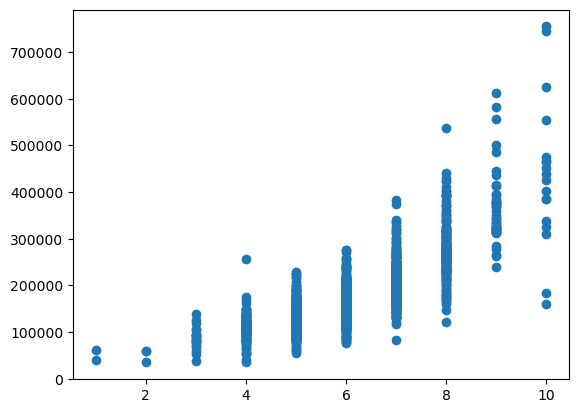

In [8]:
plt.scatter(data["OverallQual"] , data["SalePrice"]) # Loking relationship btwenn OverallQual and SalePrice

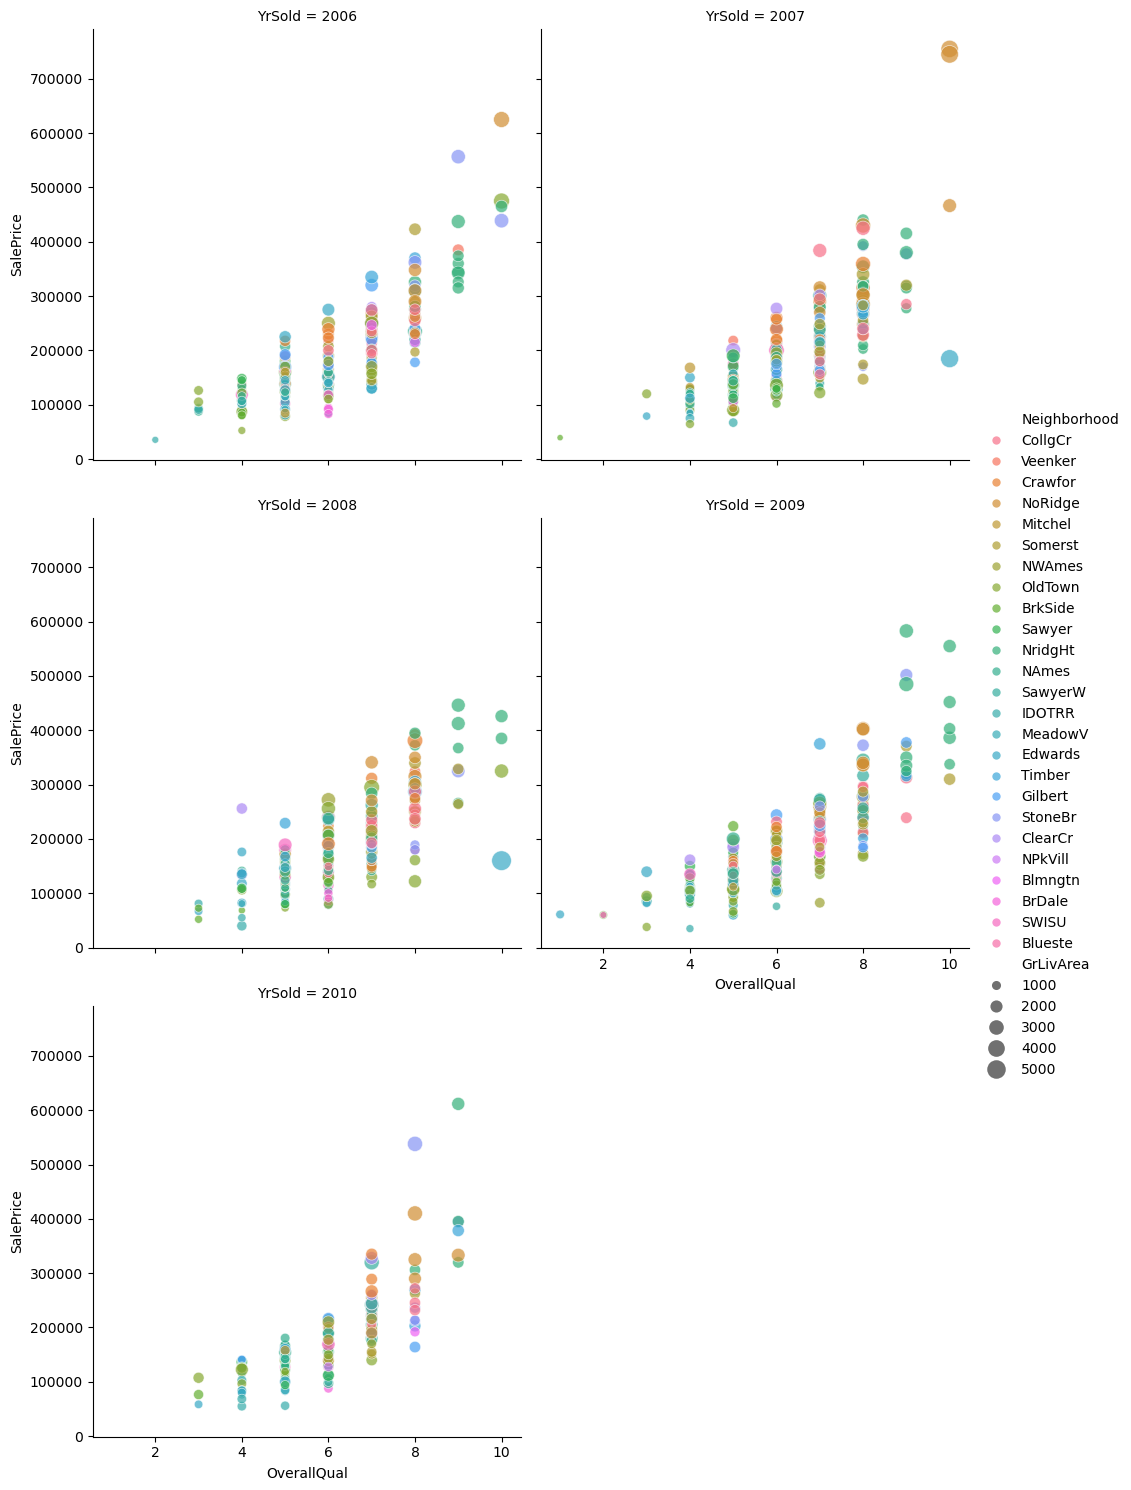

In [9]:
sns.relplot(
    data=data,
    kind="scatter",
    x="OverallQual",
    y="SalePrice",
    hue="Neighborhood",
    size="GrLivArea",
    sizes=(20, 200),     
    alpha=0.7,
    col = "YrSold",
    col_wrap = 2
)
plt.show()


In [10]:
Top_sale = data[(data["SalePrice"] >= 500000) & (data["SalePrice"] <= 755000)]
low_to_midum = data[(data["SalePrice"] >= 1460) & (data["SalePrice"] < 500000)]

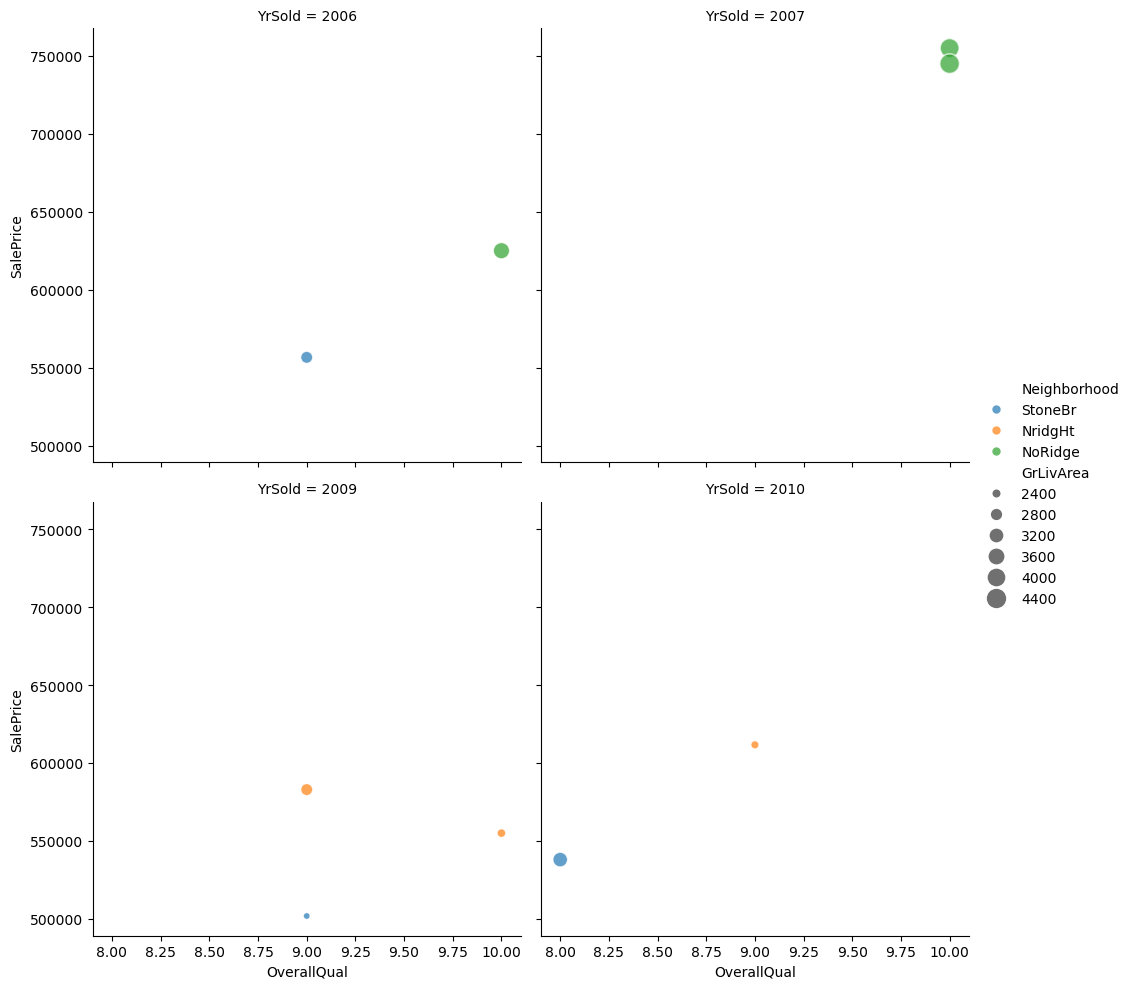

In [11]:
sns.relplot(
    data=Top_sale,
    kind="scatter",
    x="OverallQual",
    y="SalePrice",
    hue="Neighborhood",
    size="GrLivArea",
    sizes=(20, 200),     
    alpha=0.7,
    col = "YrSold",
    col_wrap = 2
)
plt.show()


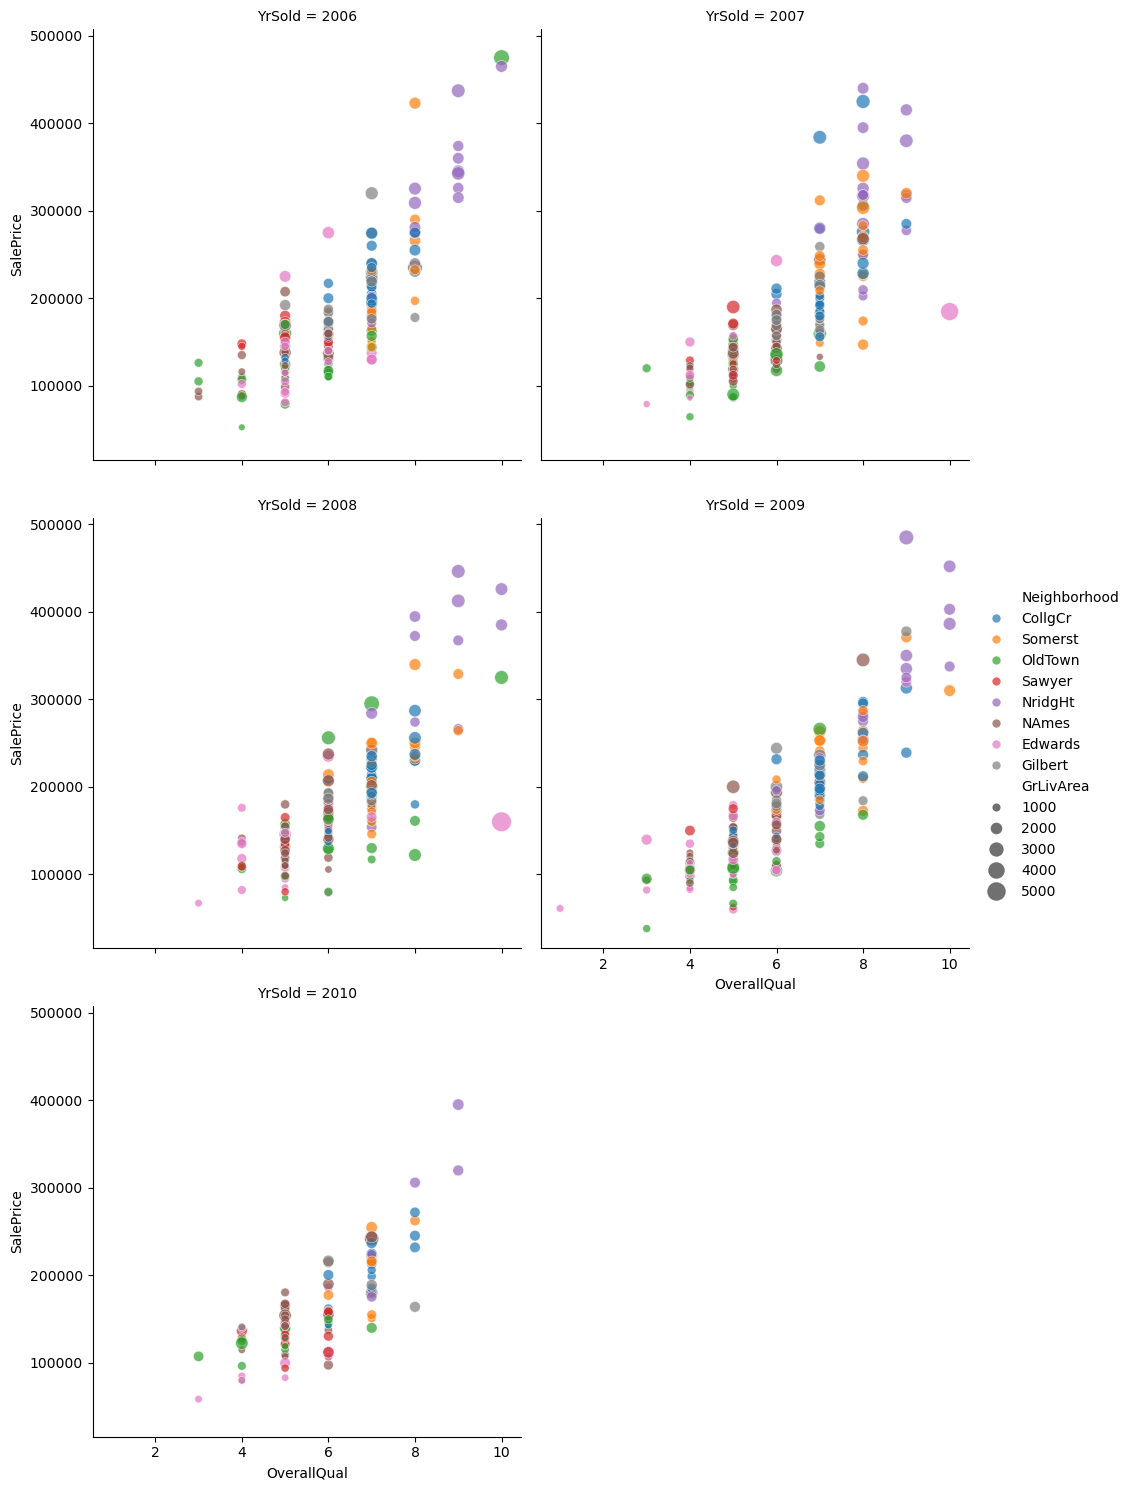

In [12]:
top_neigh = low_to_midum["Neighborhood"].value_counts().nlargest(8).index
sns.relplot(
    data=low_to_midum[low_to_midum["Neighborhood"].isin(top_neigh)],
    kind="scatter",
    x="OverallQual",
    y="SalePrice",
    hue="Neighborhood",
    size="GrLivArea",
    sizes=(20, 200),
    alpha=0.7,
    col="YrSold",
    col_wrap=2
)


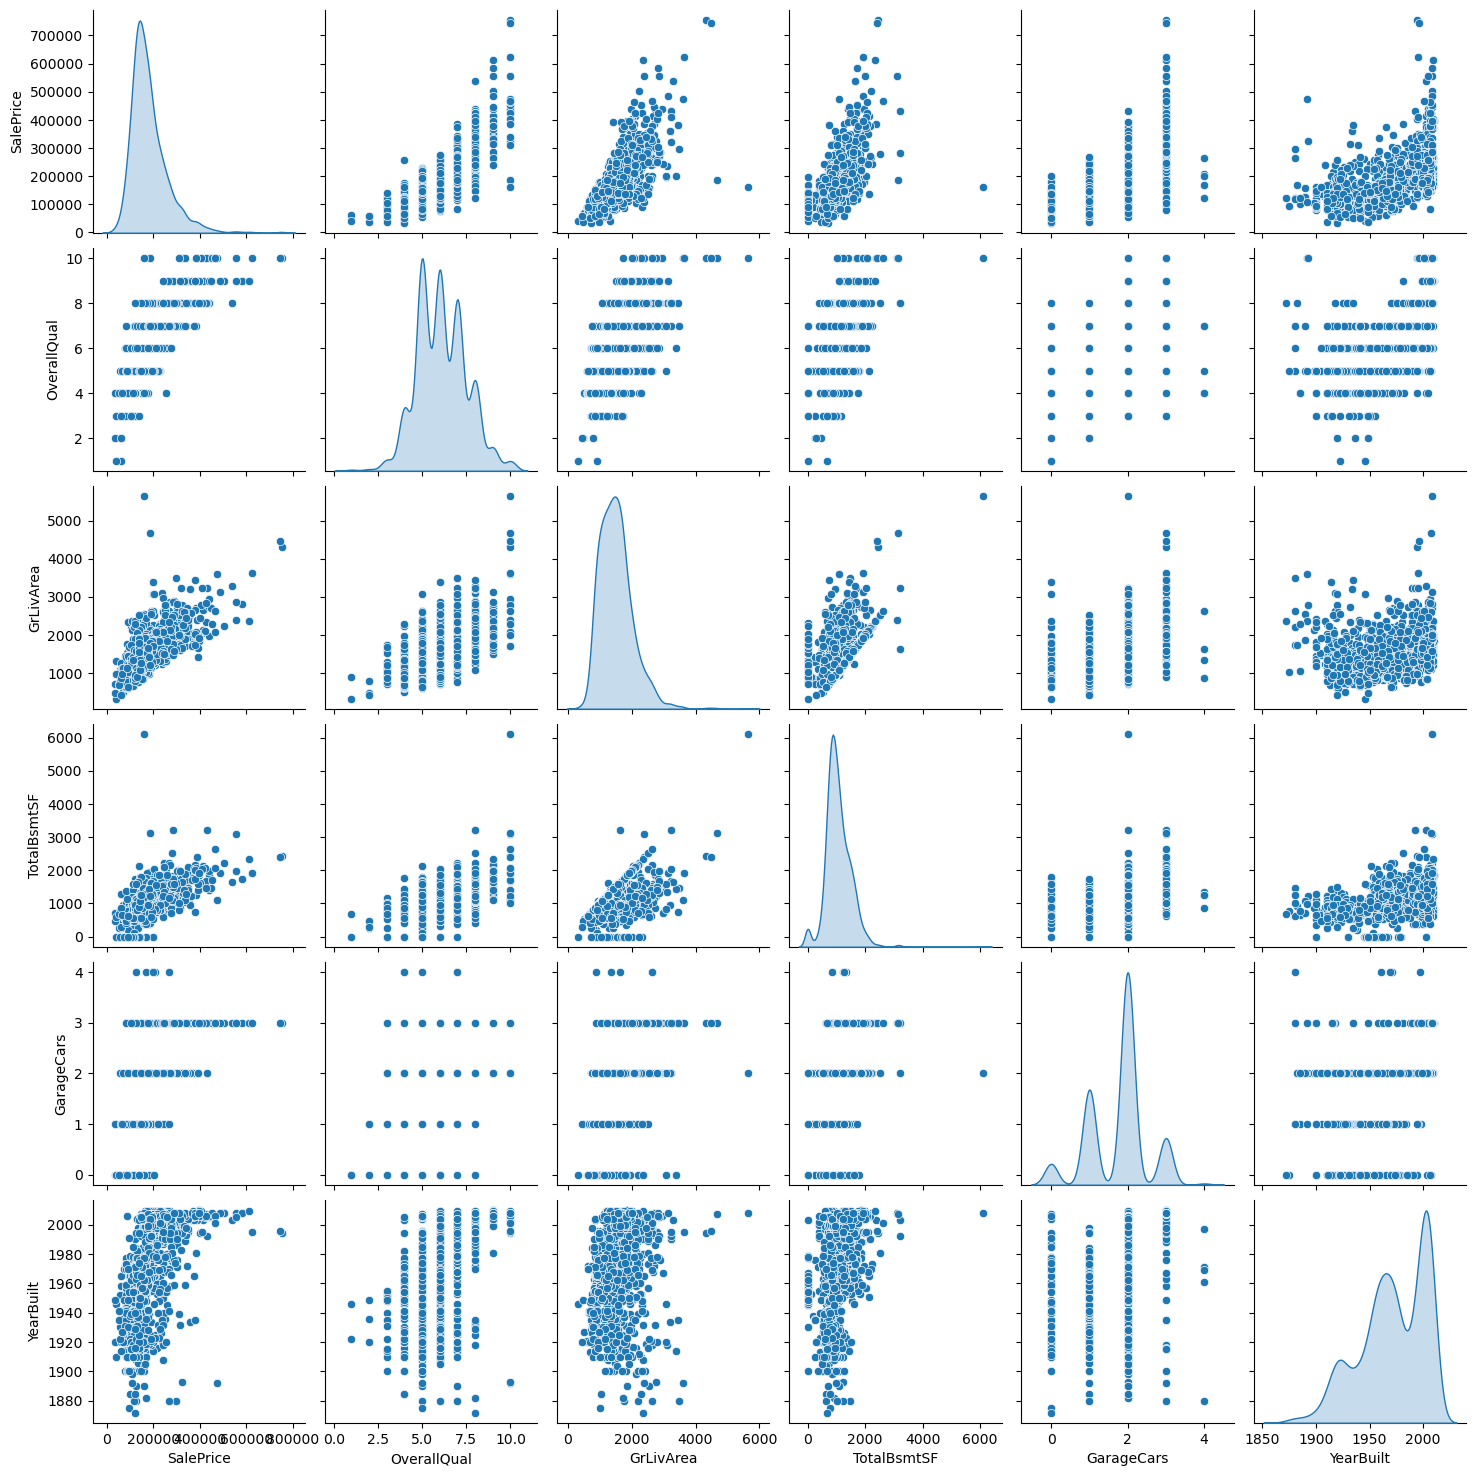

In [13]:
cols = [
    "SalePrice",     # target
    "OverallQual",   # quality
    "GrLivArea",     # above-ground living area
    "TotalBsmtSF",   # basement size
    "GarageCars",    # garage capacity
    "YearBuilt"      # age of house
]

sns.pairplot(data[cols], diag_kind="kde", height=2.5)
plt.show()


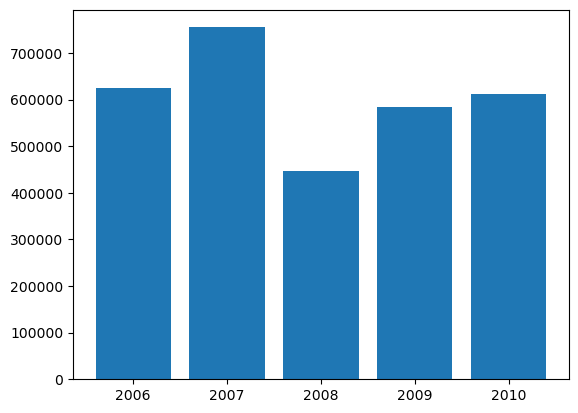

In [14]:
plt.bar(data["YrSold"],data["SalePrice"]) #bar plot
plt.show()

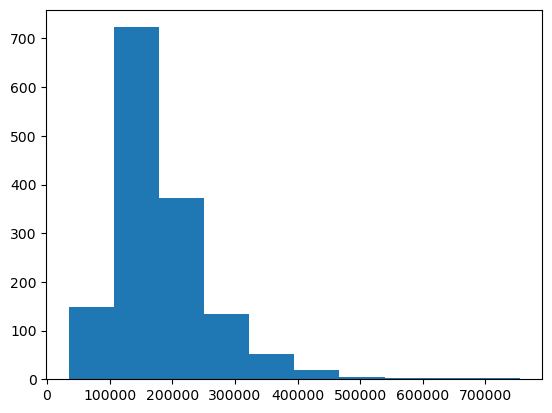

In [15]:
plt.hist(data["SalePrice"]) # Histogram plot
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

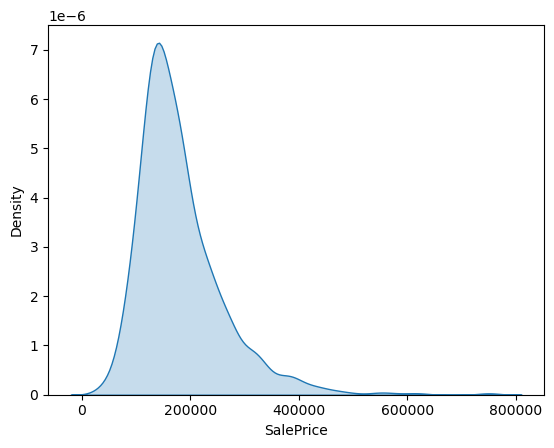

In [16]:
sns.kdeplot(data = data , x = "SalePrice",fill=True)

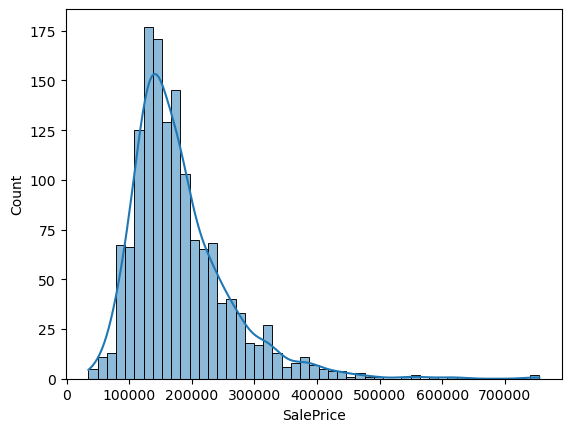

In [17]:
sns.histplot(data=data, x="SalePrice", kde=True) #Hist + kde plot in one plot
plt.show()


<Axes: xlabel='OverallQual', ylabel='count'>

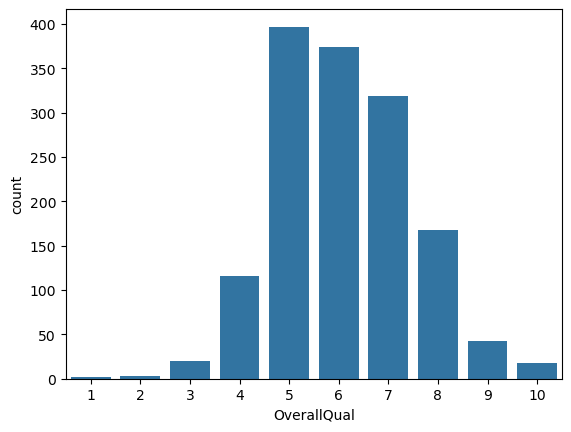

In [18]:
sns.countplot(data = data , x = "OverallQual")

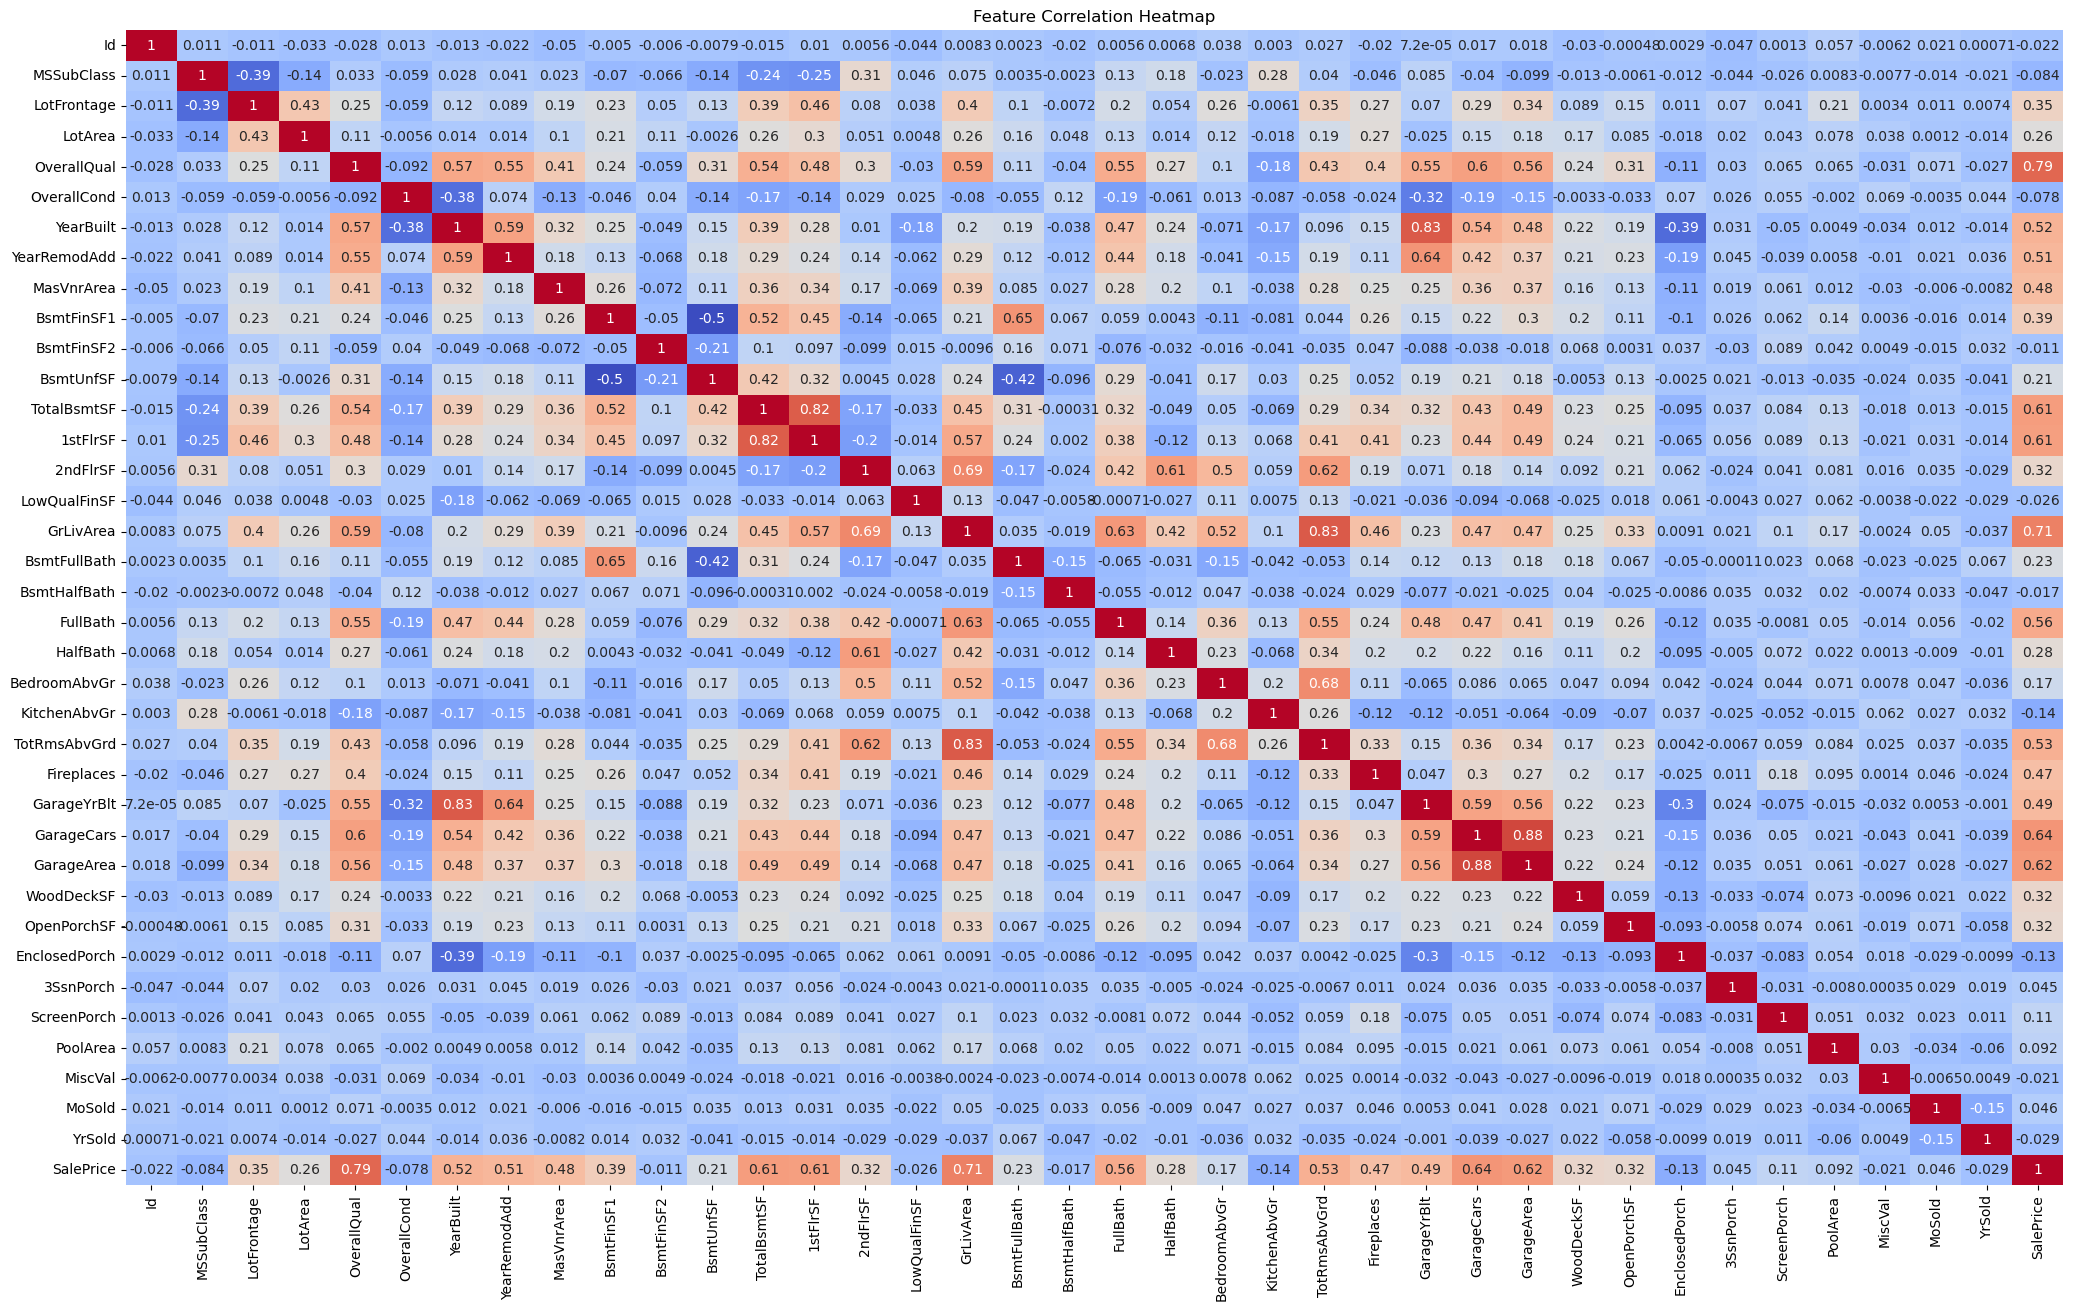

In [19]:
# Correlation heatmap
plt.figure(figsize=(25, 15))
corr_matrix = data.select_dtypes(include=["int64", "float64"]).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", cbar=False,annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

## Preprocessing

In [20]:
# Checking NULL values 
pd.set_option("display.max_rows", None)
data.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [21]:
cols_to_drop = ["MiscFeature","Fence","PoolQC","FireplaceQu","MasVnrType","Alley"]
data.drop(columns=cols_to_drop, inplace=True) # Dropping the null columns 

In [22]:
# si = SimpleImputer(strategy = "mean")
# data["LotFrontage"] = si.fit_transform(data[["LotFrontage"]])
# data["MasVnrArea"] = si.fit_transform(data[["MasVnrArea"]])

In [23]:
data.dropna(subset=["GarageCond","GarageQual","GarageFinish","GarageType","GarageType","BsmtFinType2",
                    "BsmtQual","BsmtCond","BsmtExposure","Electrical"],inplace=True)

In [24]:
data.isnull().sum() / len(data) * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.276374
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrArea        0.594354
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
H

In [25]:
data.duplicated().sum() # checking duplicated values in dataset

0

Id


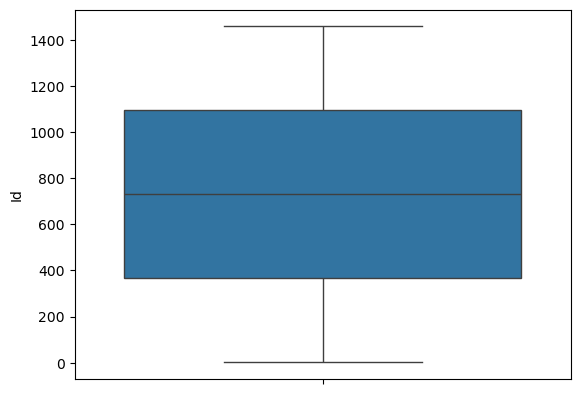

MSSubClass


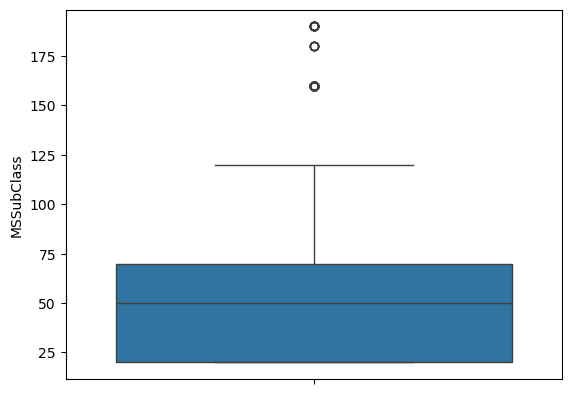

LotFrontage


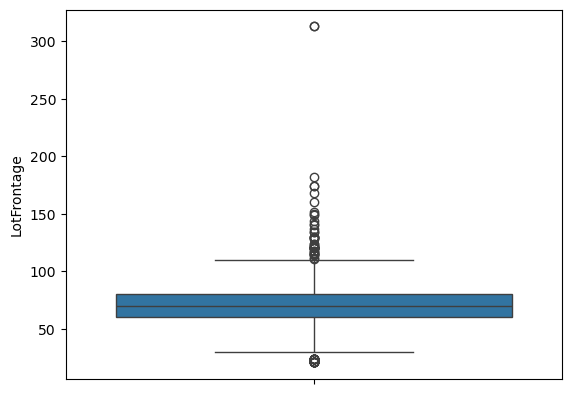

LotArea


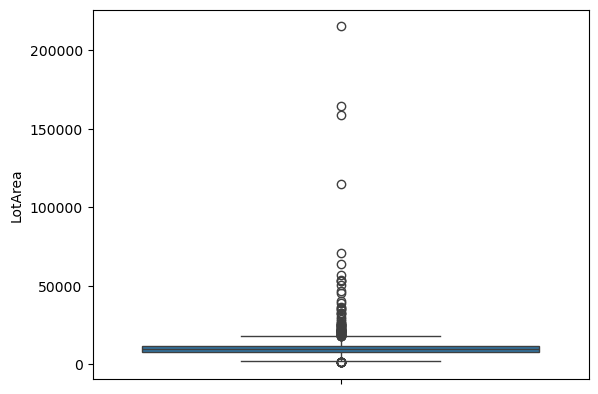

OverallQual


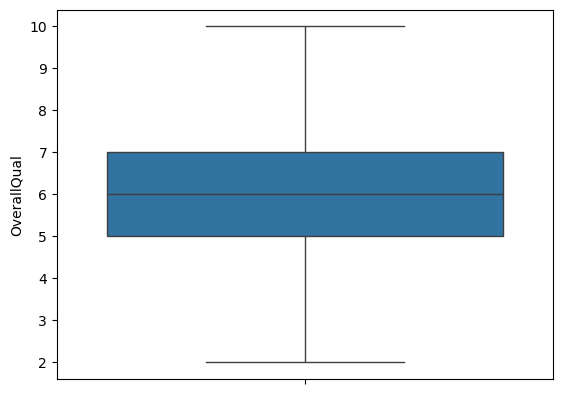

OverallCond


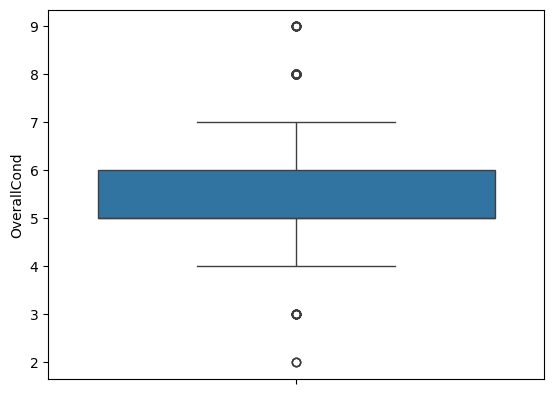

YearBuilt


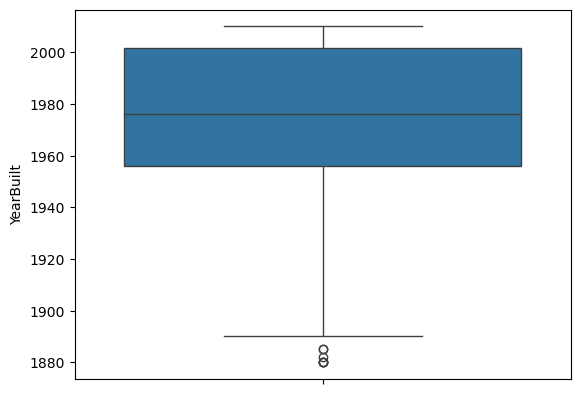

YearRemodAdd


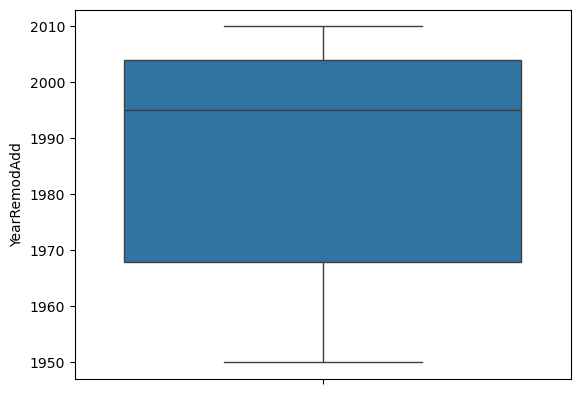

MasVnrArea


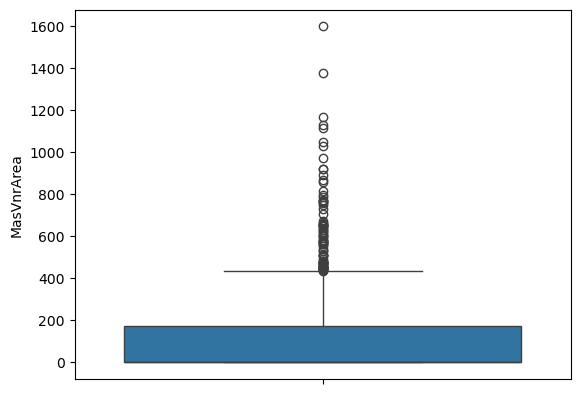

BsmtFinSF1


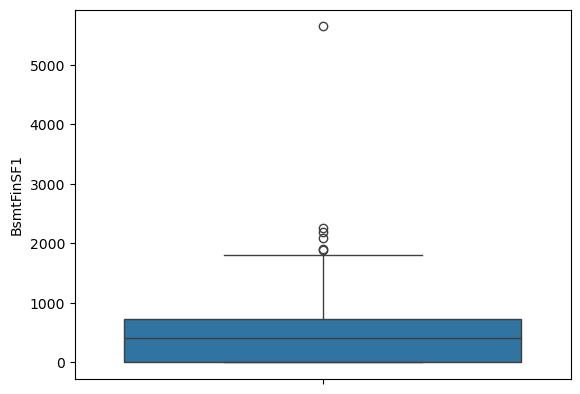

BsmtFinSF2


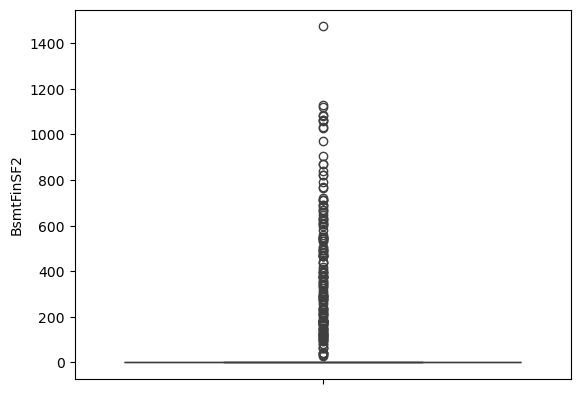

BsmtUnfSF


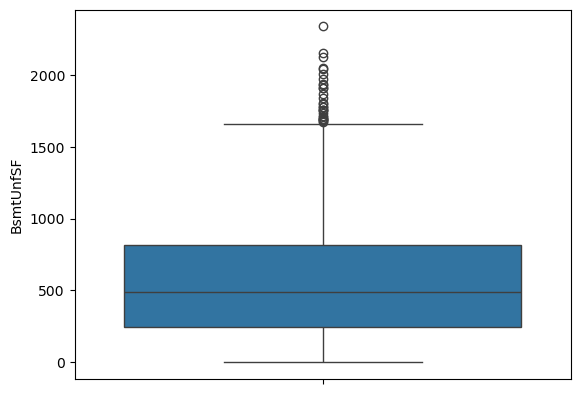

TotalBsmtSF


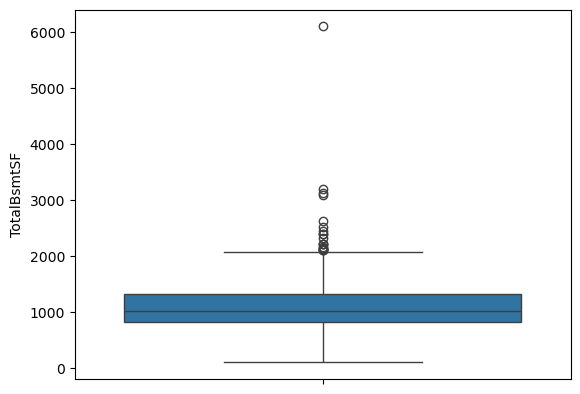

1stFlrSF


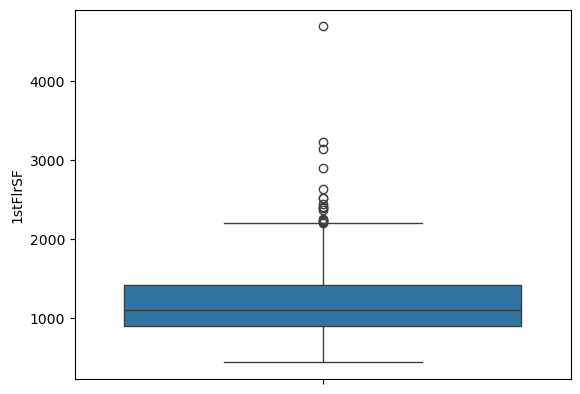

2ndFlrSF


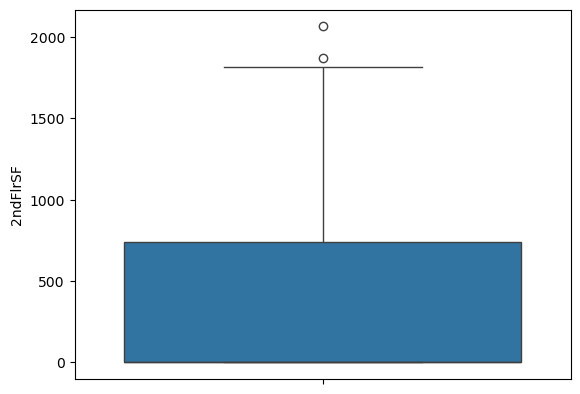

LowQualFinSF


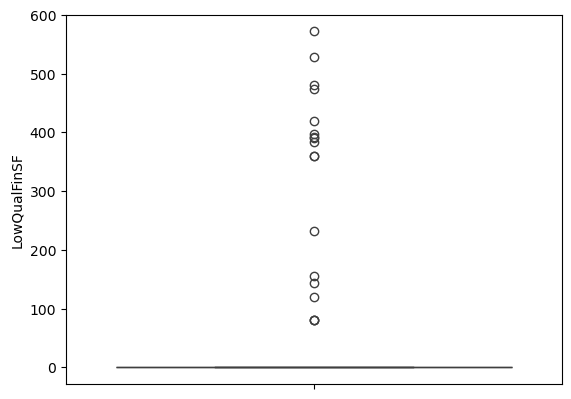

GrLivArea


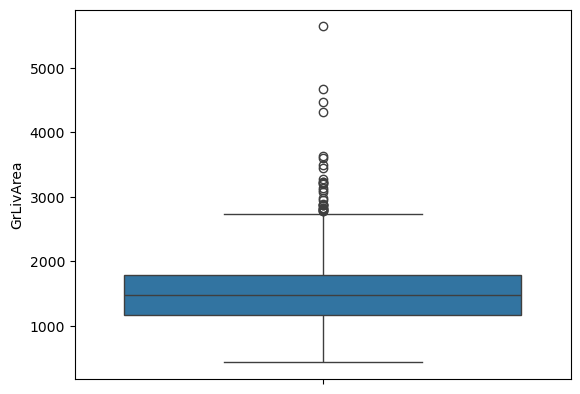

BsmtFullBath


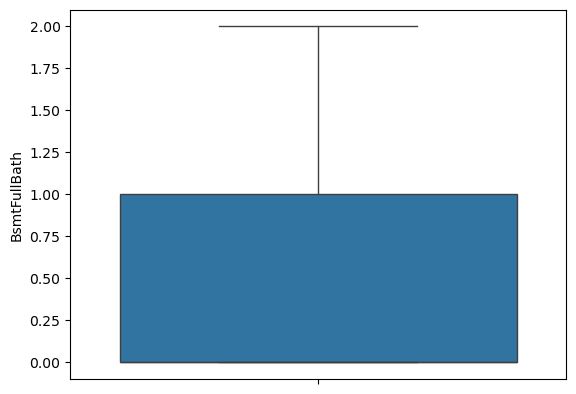

BsmtHalfBath


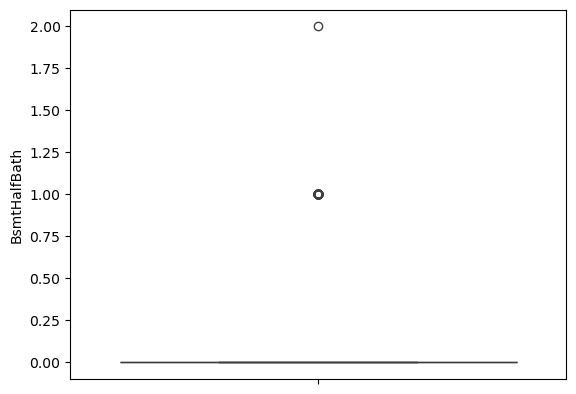

FullBath


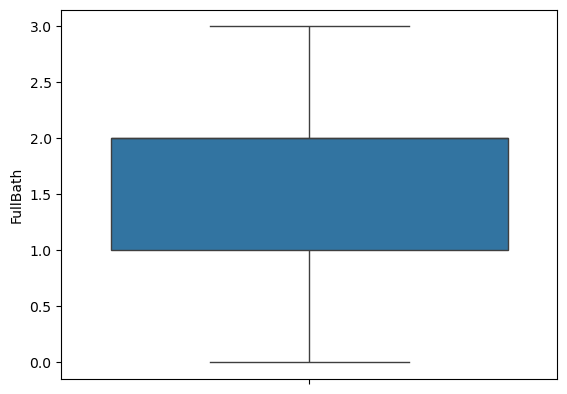

HalfBath


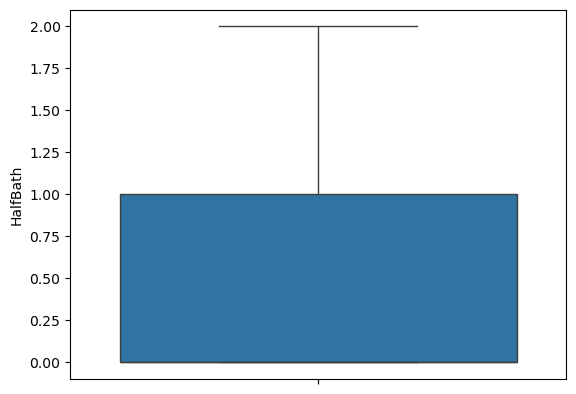

BedroomAbvGr


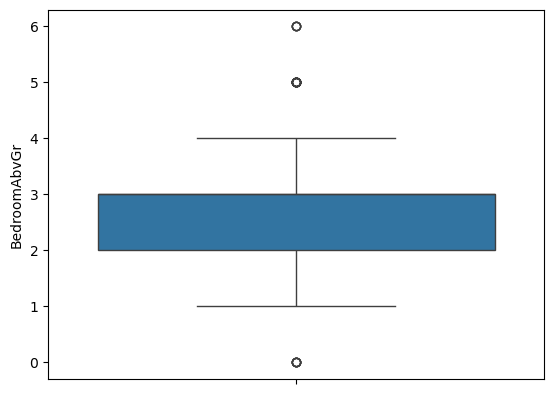

KitchenAbvGr


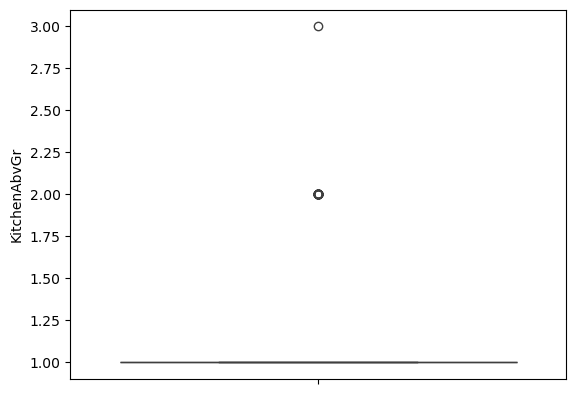

TotRmsAbvGrd


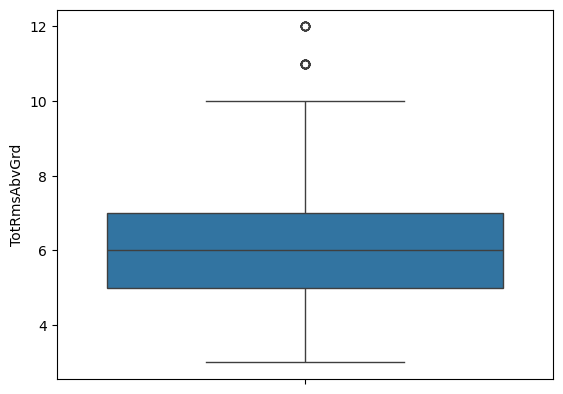

Fireplaces


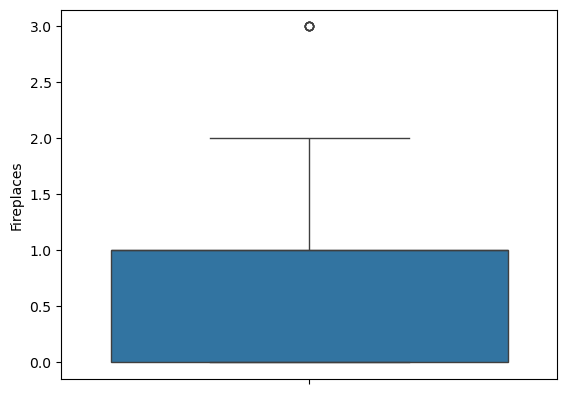

GarageYrBlt


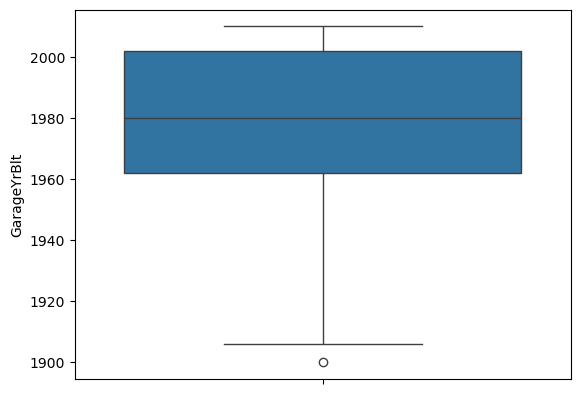

GarageCars


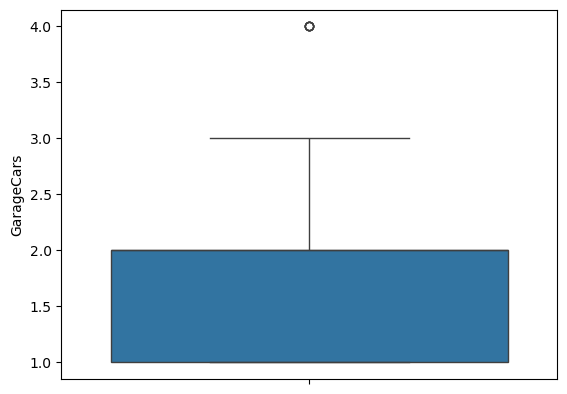

GarageArea


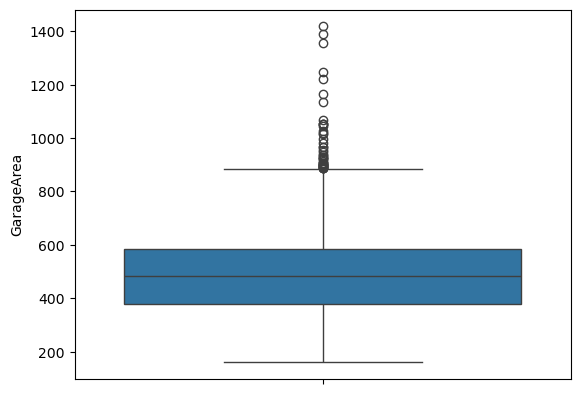

WoodDeckSF


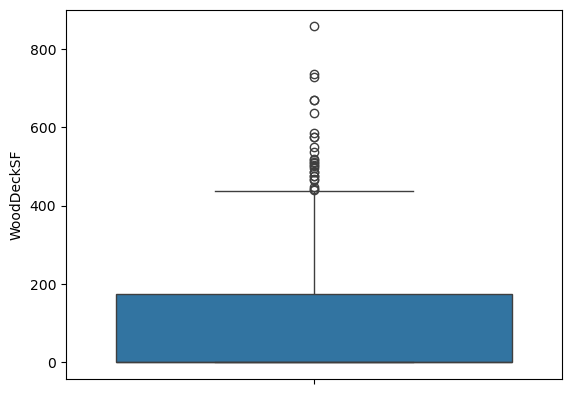

OpenPorchSF


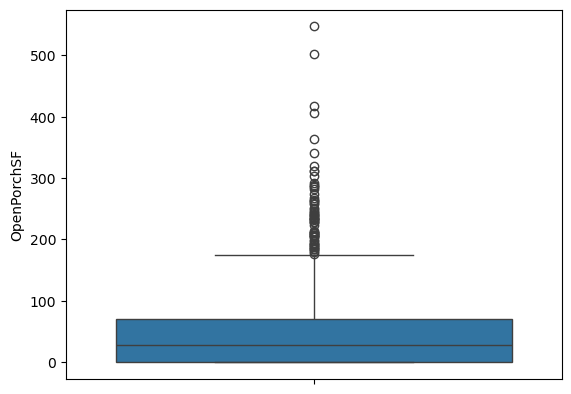

EnclosedPorch


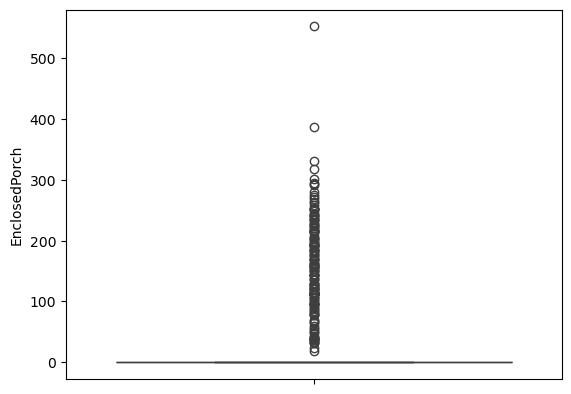

3SsnPorch


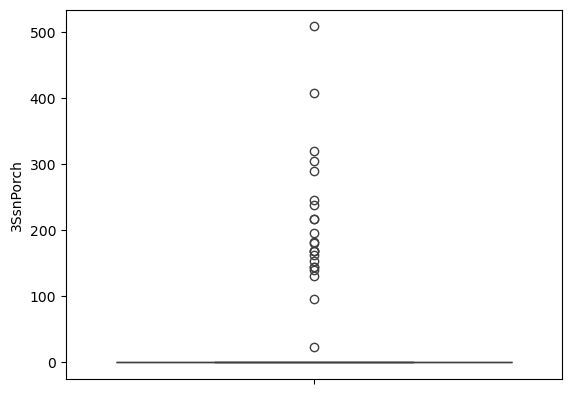

ScreenPorch


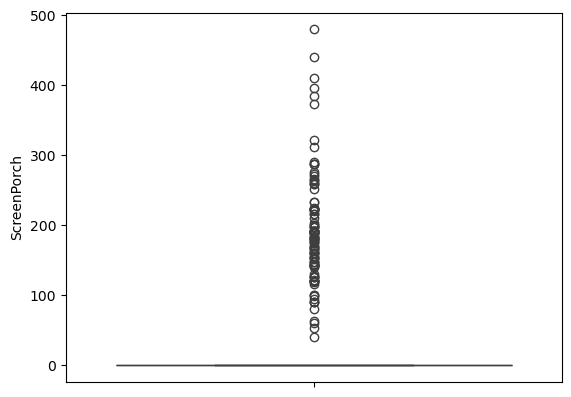

PoolArea


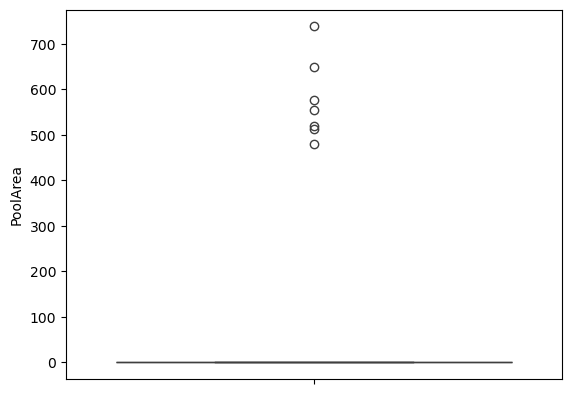

MiscVal


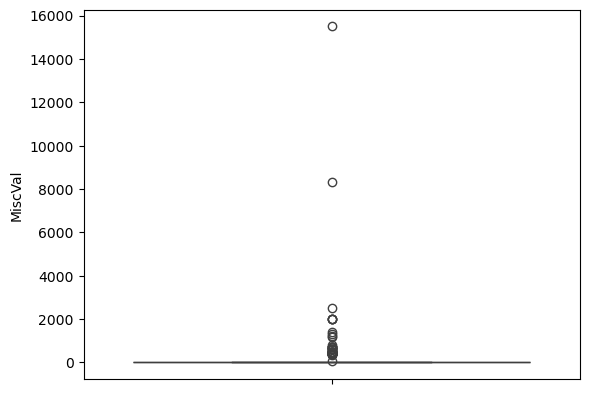

MoSold


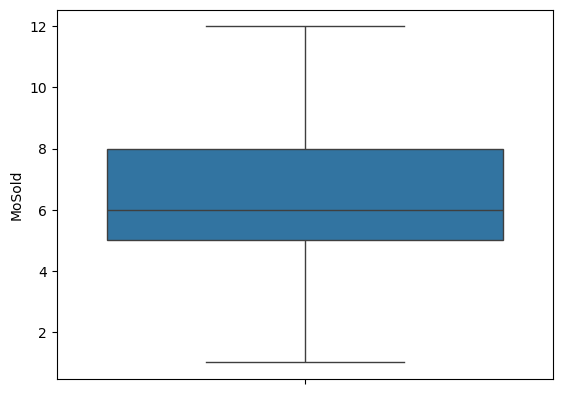

YrSold


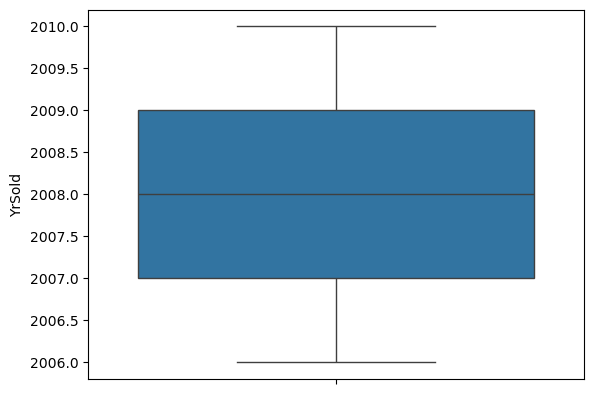

SalePrice


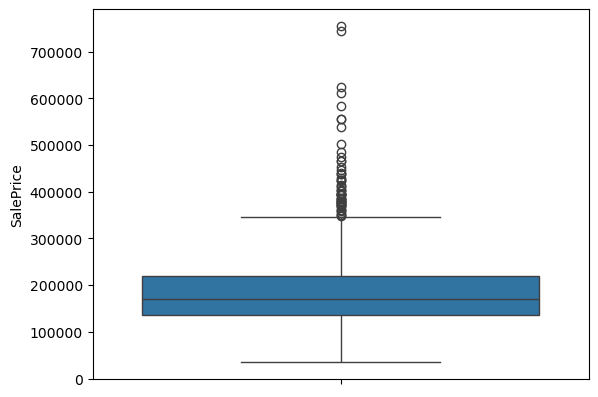

In [26]:
# BoxPlot

for col in data.select_dtypes(include=["int64","float64"]).columns:
    print(col)
    sns.boxplot(data[col])
    plt.show()

Id


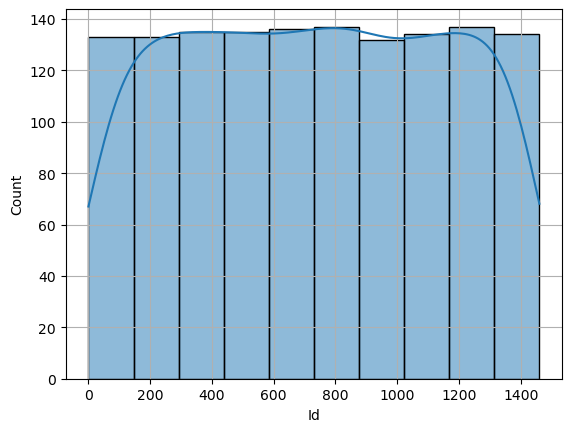

MSSubClass


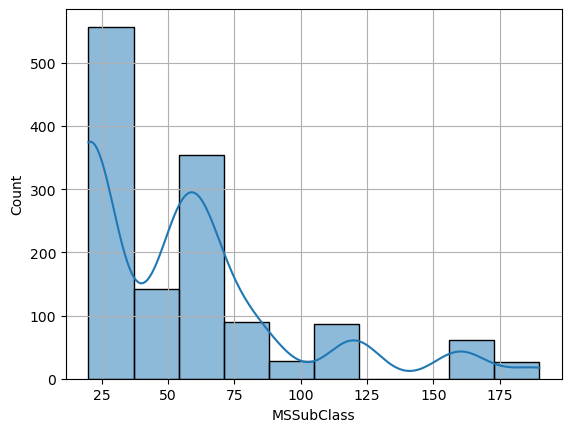

LotFrontage


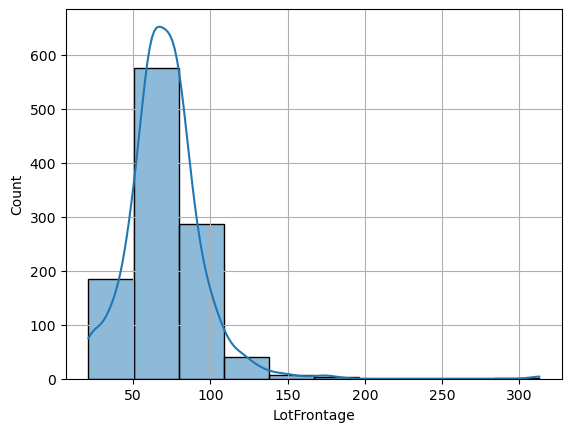

LotArea


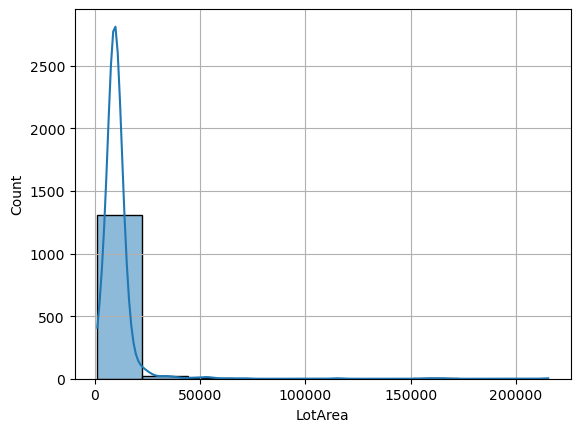

OverallQual


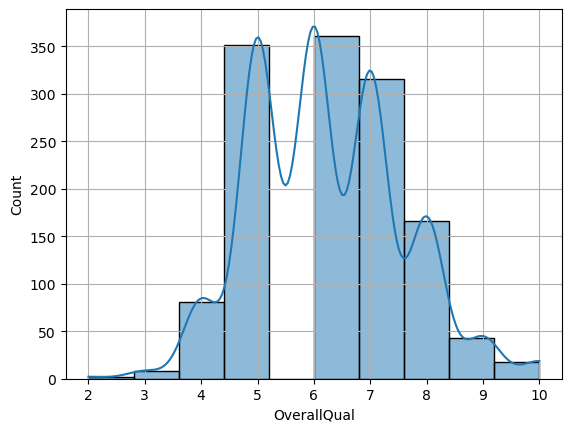

OverallCond


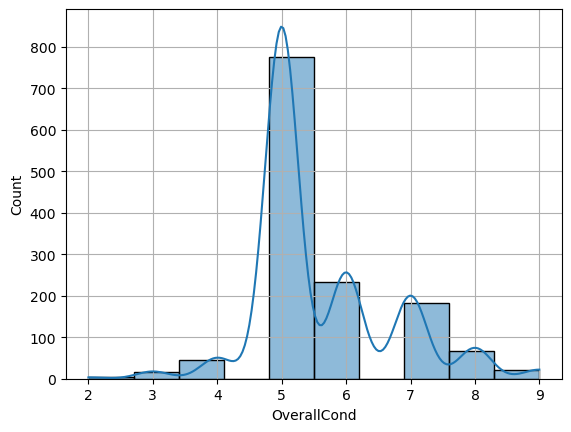

YearBuilt


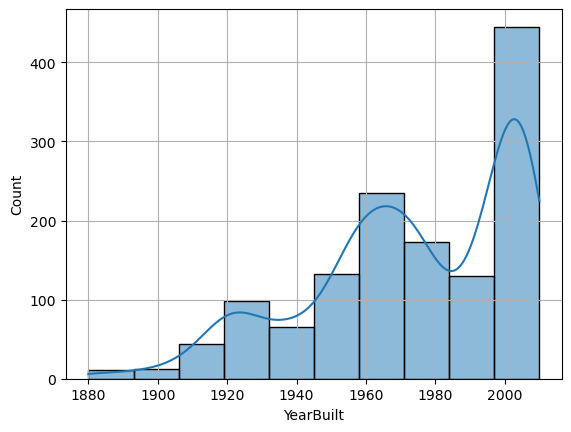

YearRemodAdd


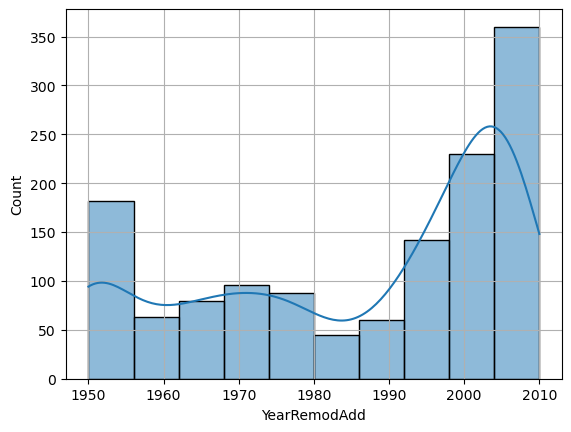

MasVnrArea


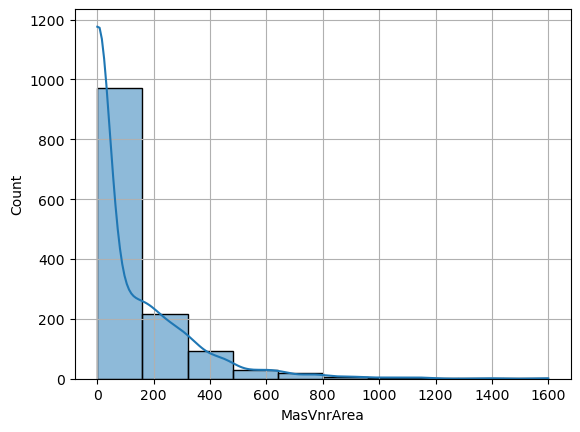

BsmtFinSF1


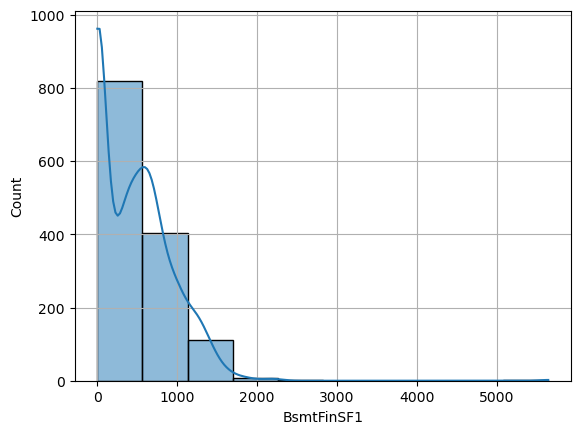

BsmtFinSF2


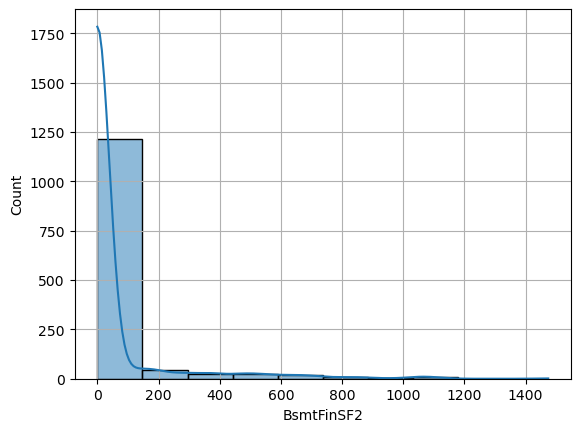

BsmtUnfSF


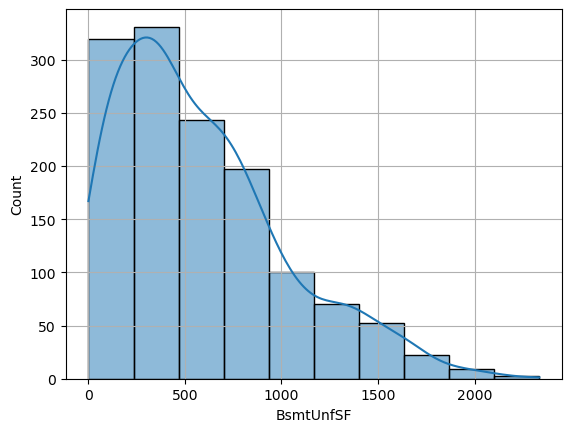

TotalBsmtSF


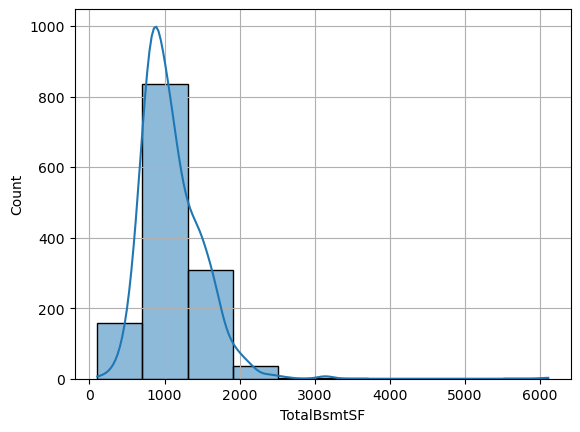

1stFlrSF


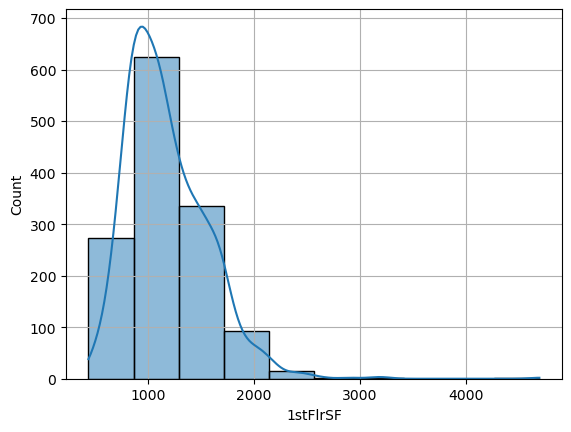

2ndFlrSF


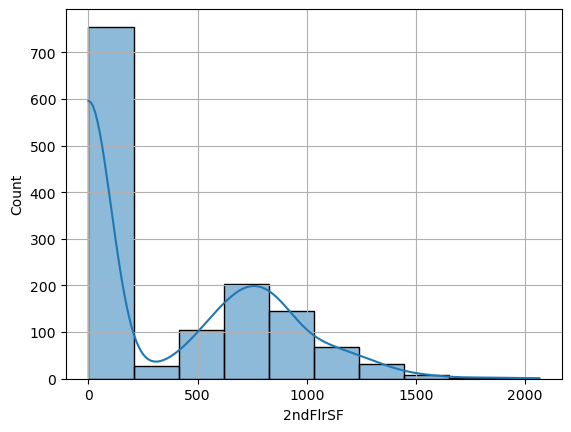

LowQualFinSF


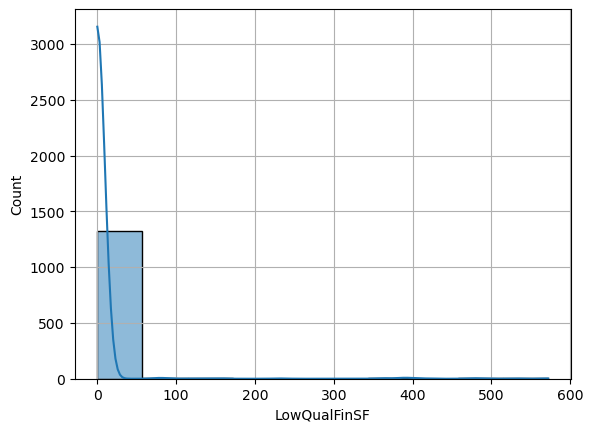

GrLivArea


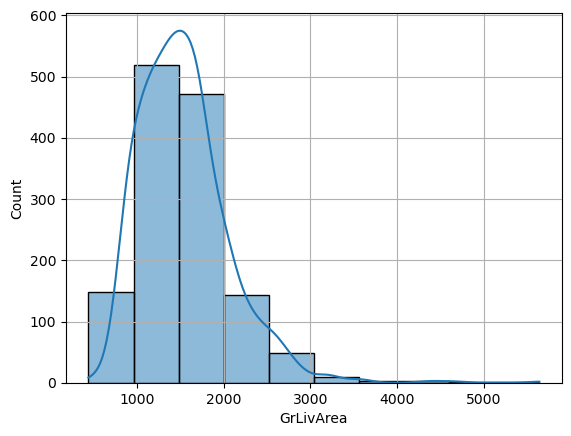

BsmtFullBath


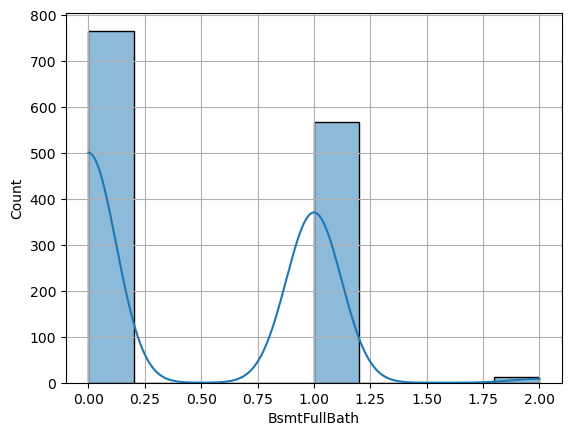

BsmtHalfBath


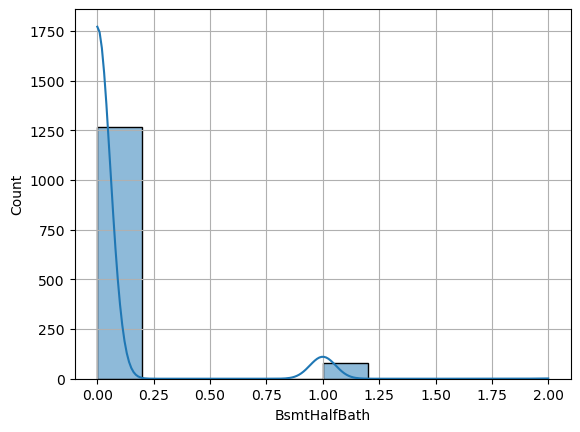

FullBath


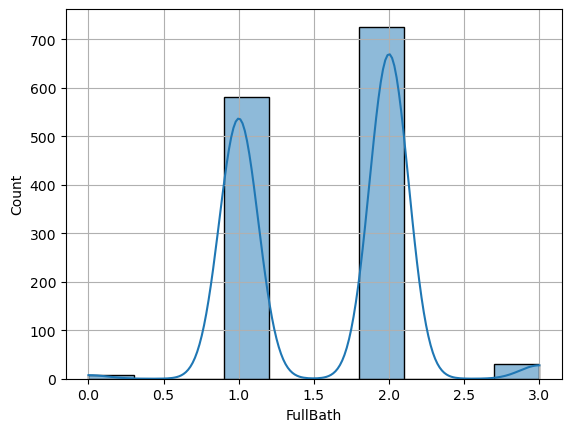

HalfBath


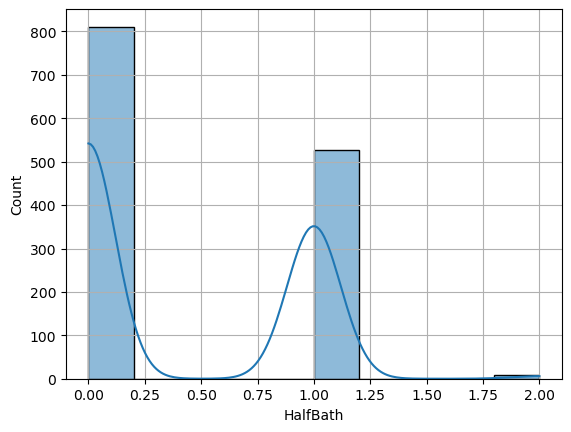

BedroomAbvGr


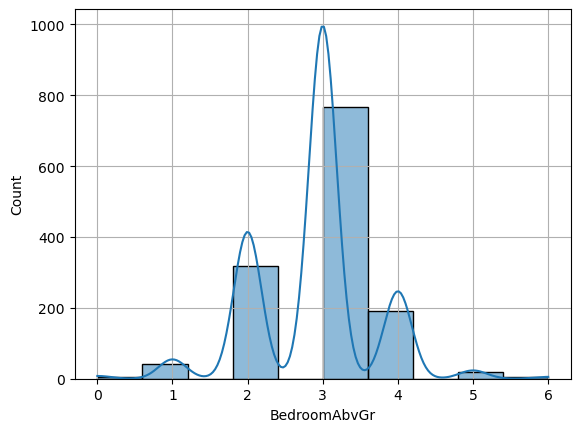

KitchenAbvGr


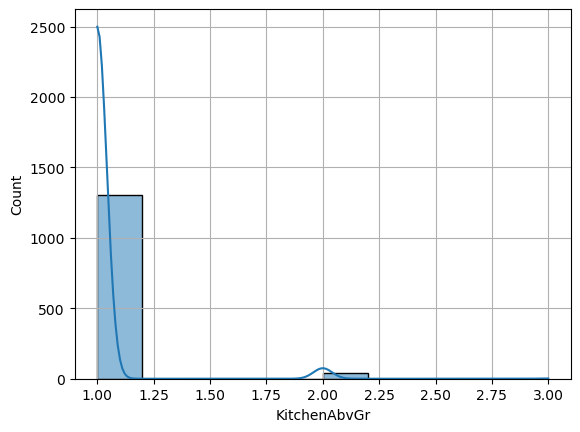

TotRmsAbvGrd


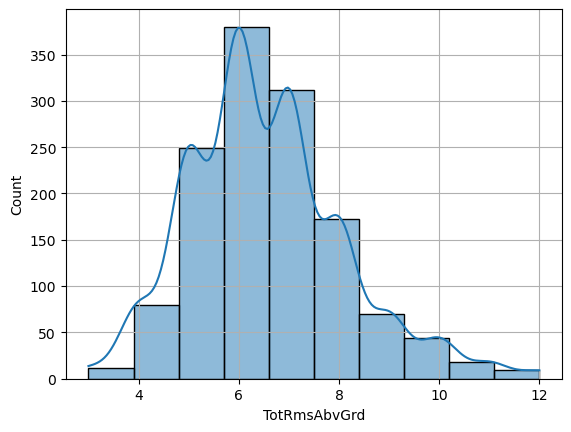

Fireplaces


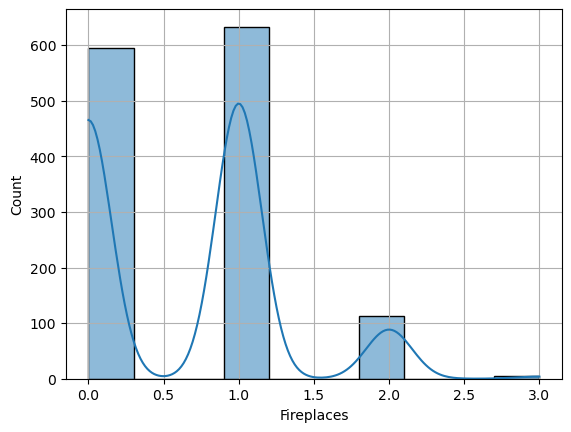

GarageYrBlt


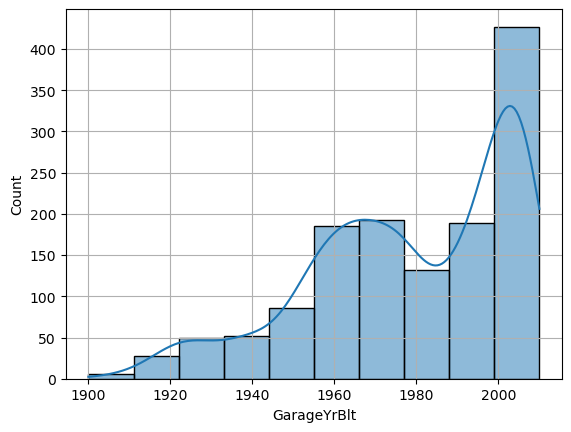

GarageCars


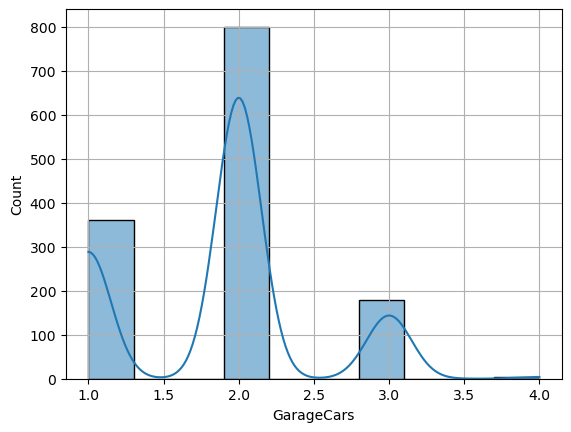

GarageArea


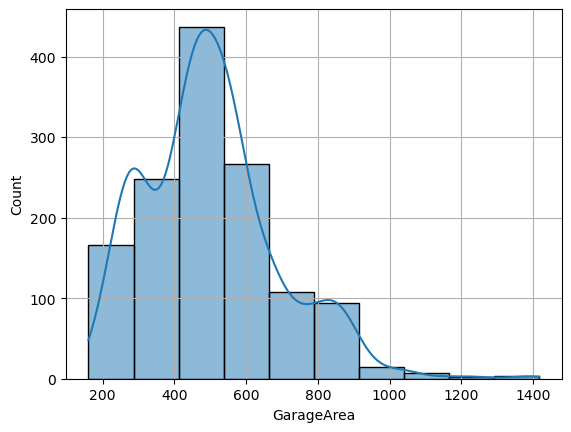

WoodDeckSF


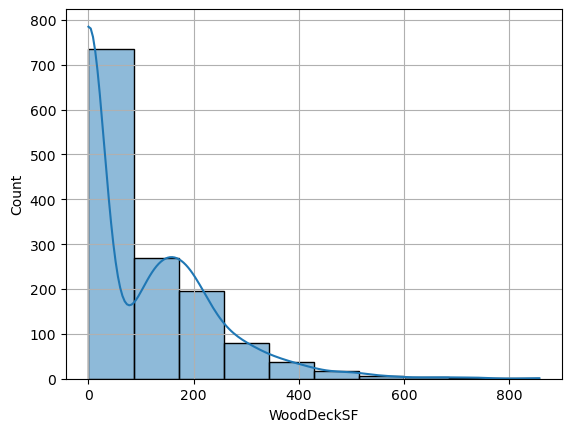

OpenPorchSF


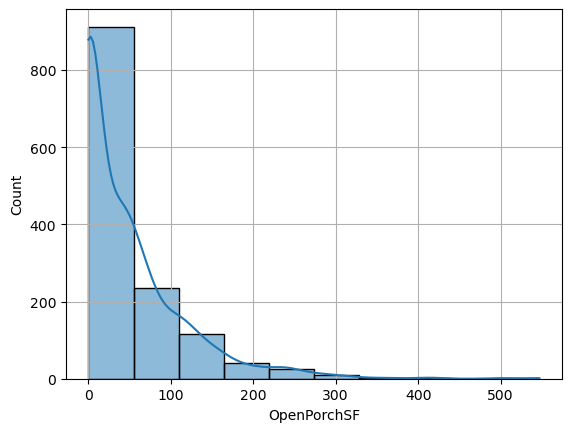

EnclosedPorch


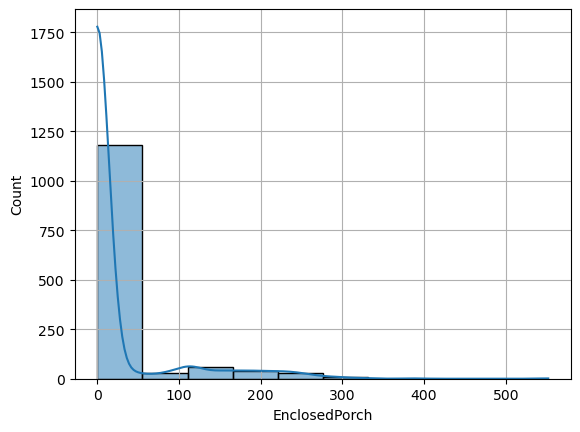

3SsnPorch


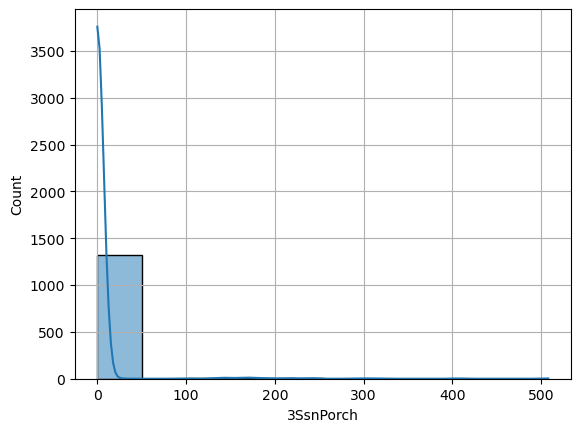

ScreenPorch


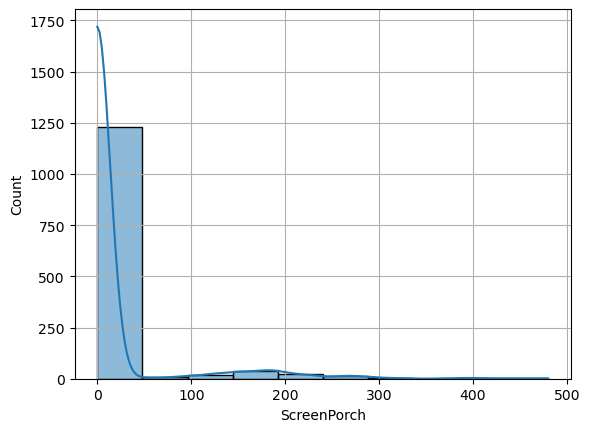

PoolArea


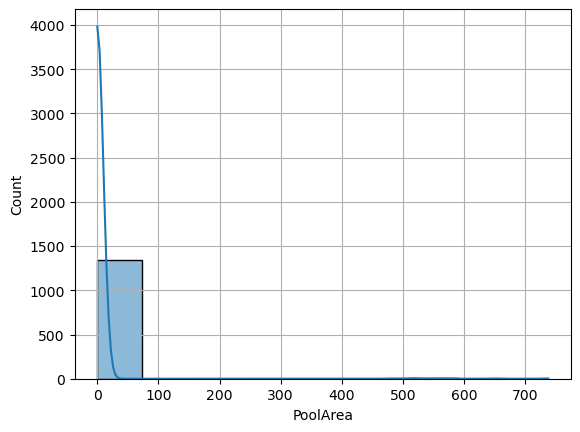

MiscVal


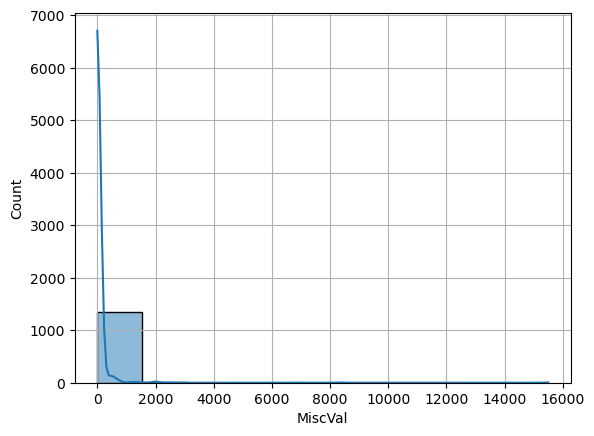

MoSold


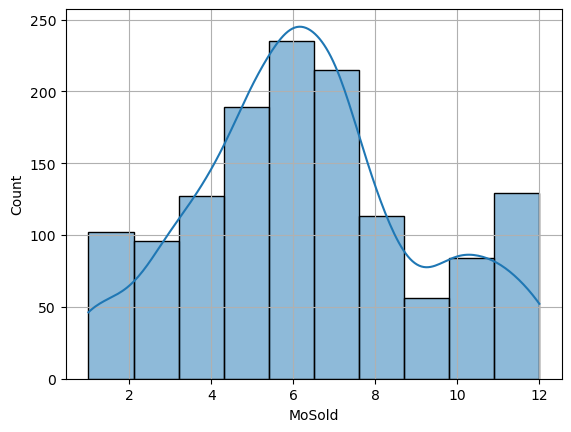

YrSold


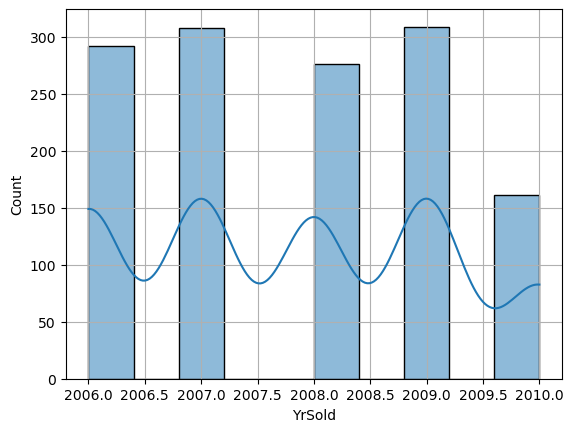

SalePrice


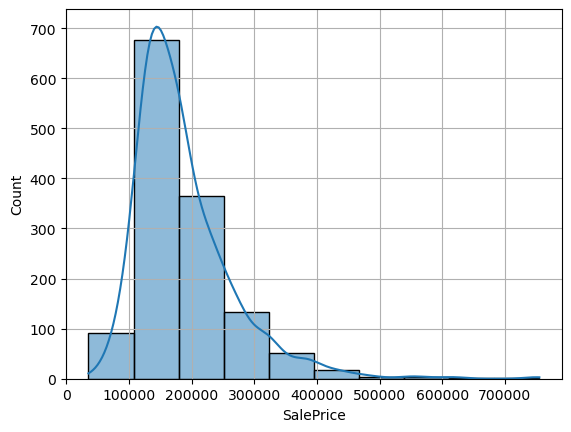

In [27]:
# Kdeplot

for col in data.select_dtypes(include=["int64","float64"]).columns:
    print(col)
    sns.histplot(data[col],bins=10 ,kde = True)
    plt.grid(True)
    plt.show()

In [28]:
outiler_col = ["LotFrontage","LotArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
              "1stFlrSF","2ndFlrSF","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","ScreenPorch"]

In [29]:
# Reomving outiler
def iqr_range(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = np.where(
        data[col] < lower_bound, lower_bound,
        np.where(data[col] > upper_bound, upper_bound, data[col])
    )
for col in outiler_col:
    iqr_range(col)

Text(0.5, 1.0, 'Before Log transform')

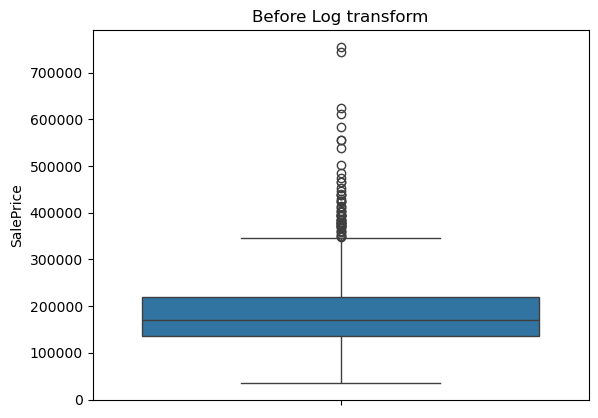

In [30]:
sns.boxplot(data["SalePrice"]) 
plt.title("Before Log transform")

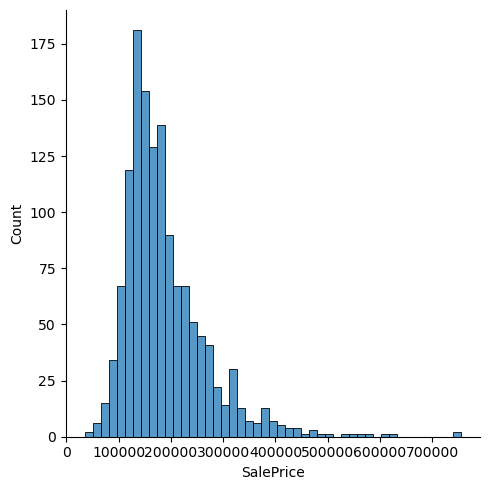

In [31]:
sns.displot(data["SalePrice"])

In [32]:
data["SalePrice"] = np.log1p(data["SalePrice"]) # appling log transform in target

Text(0.5, 1.0, 'After Log transform')

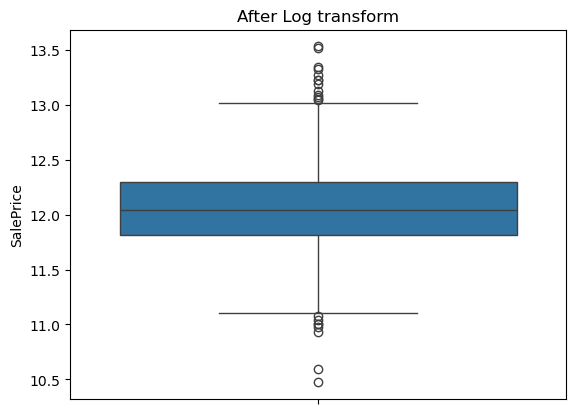

In [33]:
sns.boxplot(data["SalePrice"]) 
plt.title("After Log transform")

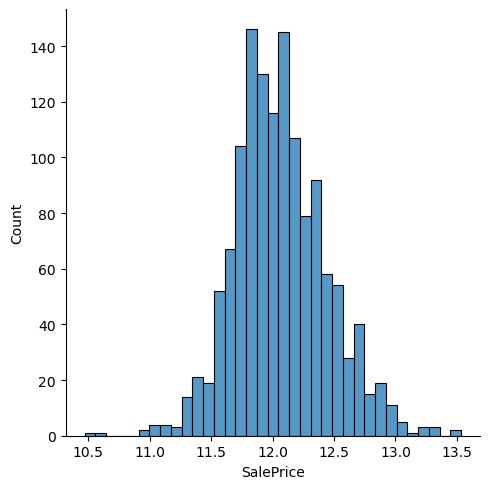

In [34]:
sns.displot(data["SalePrice"])

In [35]:
iqr_range("SalePrice") # Removing outiler from the target 

Text(0.5, 1.0, 'After handling outiler')

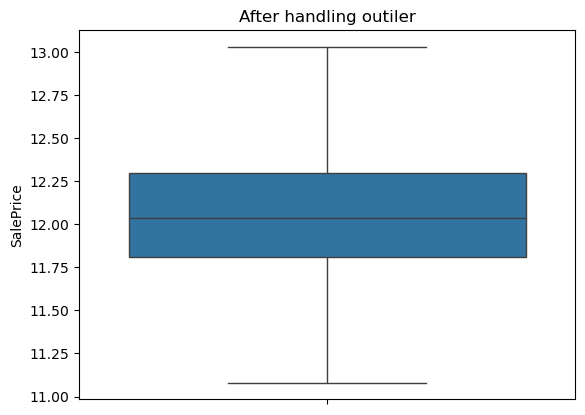

In [36]:
sns.boxplot(data["SalePrice"]) 
plt.title("After handling outiler")

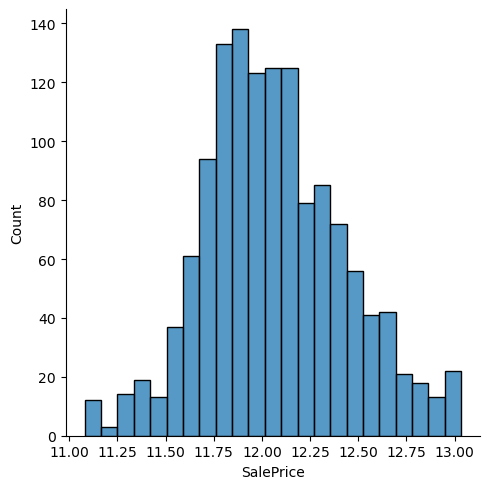

In [37]:
sns.displot(data["SalePrice"])

In [38]:
# Handling missing values 
si = SimpleImputer(strategy = "mean")
data["LotFrontage"] = si.fit_transform(data[["LotFrontage"]])
data["MasVnrArea"] = si.fit_transform(data[["MasVnrArea"]])

<Axes: xlabel='SalePrice', ylabel='Density'>

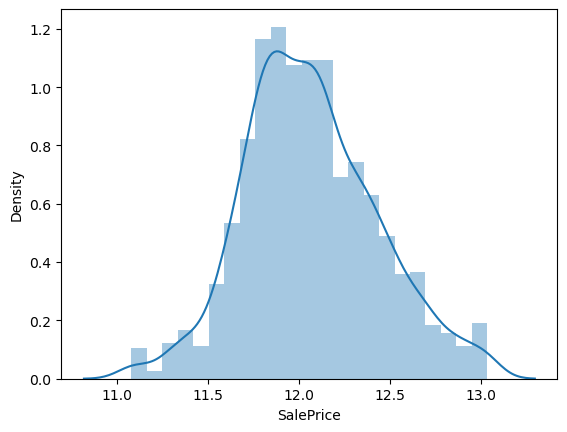

In [39]:
sns.distplot(data["SalePrice"])

<Axes: ylabel='SalePrice'>

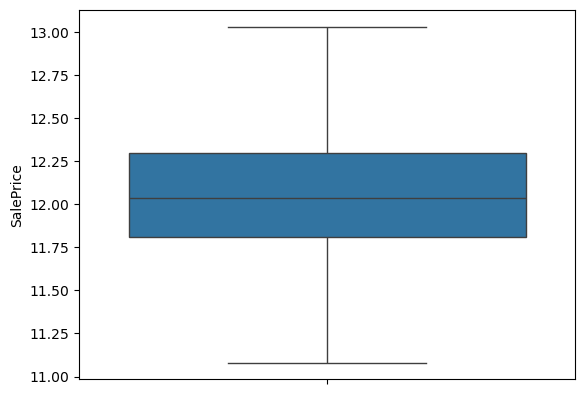

In [40]:
sns.boxplot(data["SalePrice"])

Id


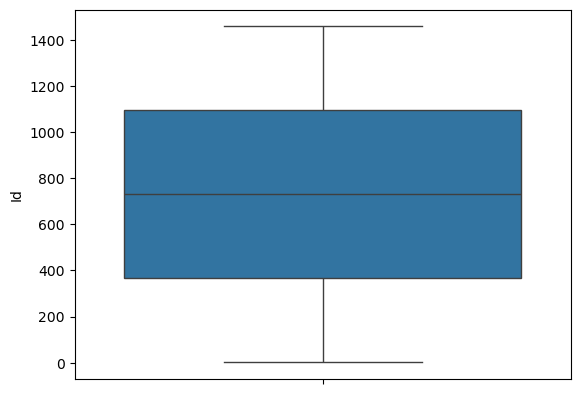

MSSubClass


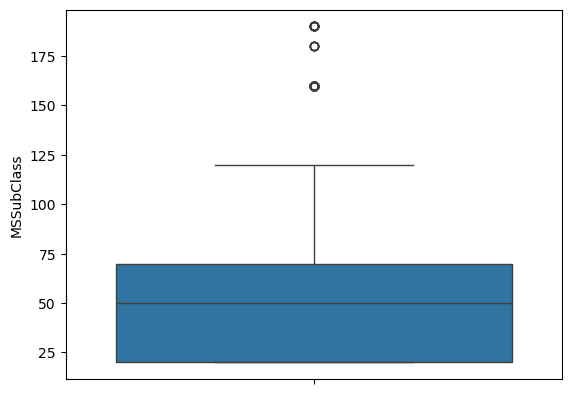

LotFrontage


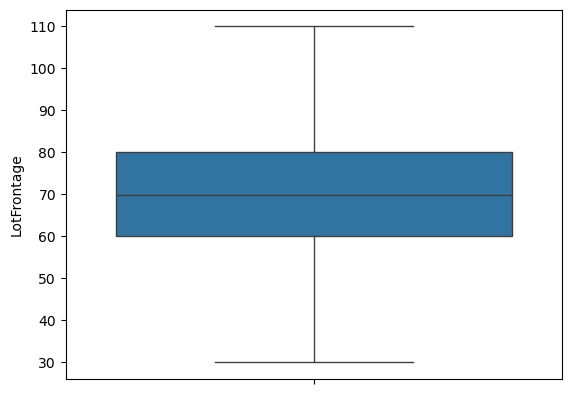

LotArea


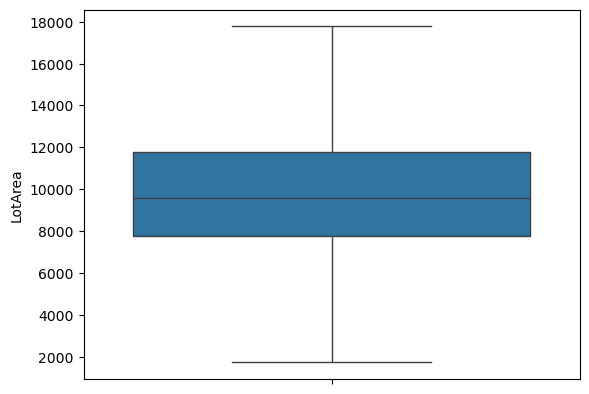

OverallQual


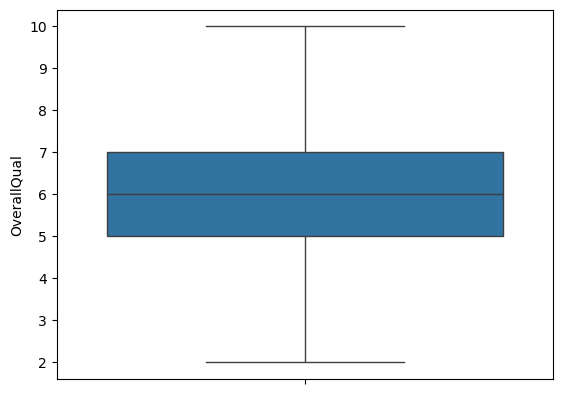

OverallCond


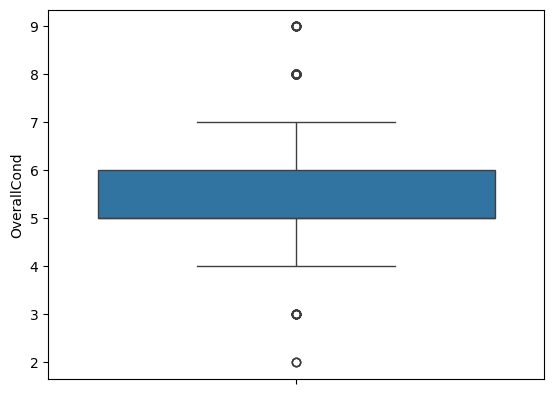

YearBuilt


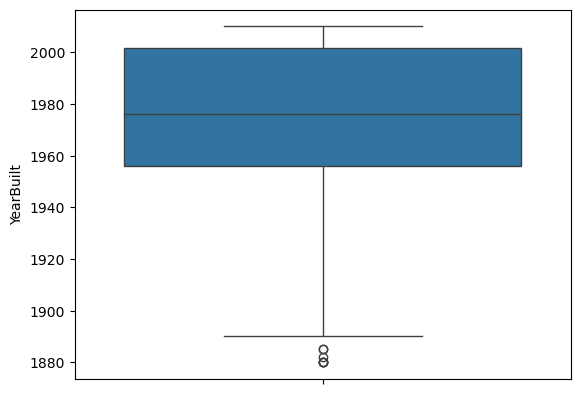

YearRemodAdd


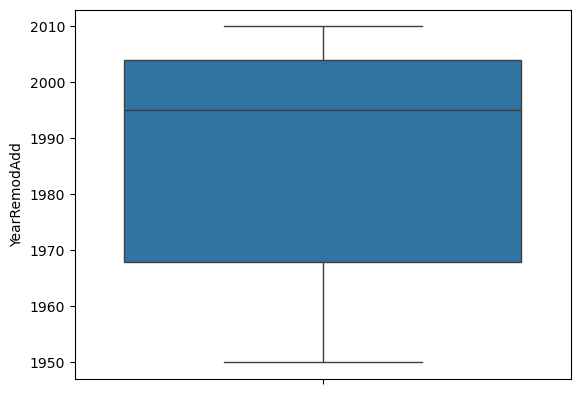

MasVnrArea


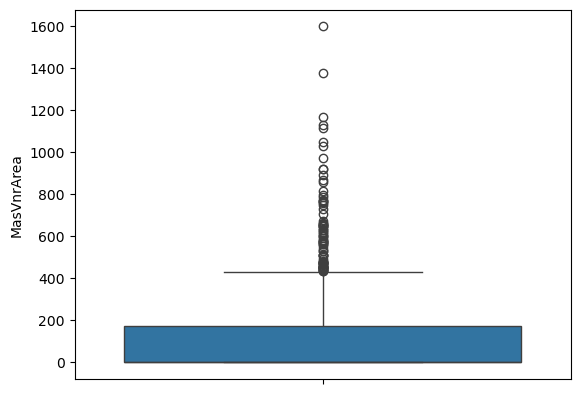

BsmtFinSF1


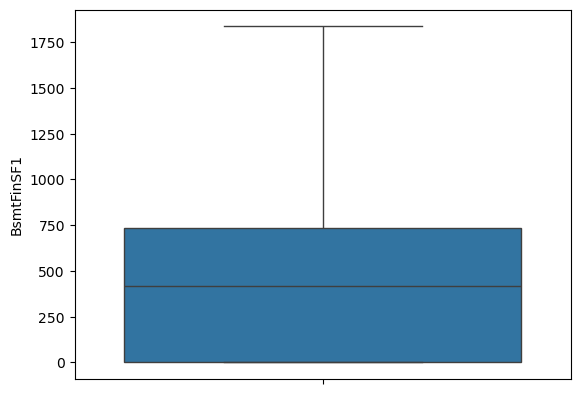

BsmtFinSF2


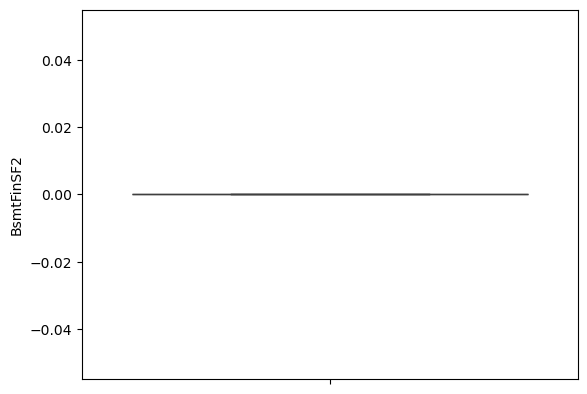

BsmtUnfSF


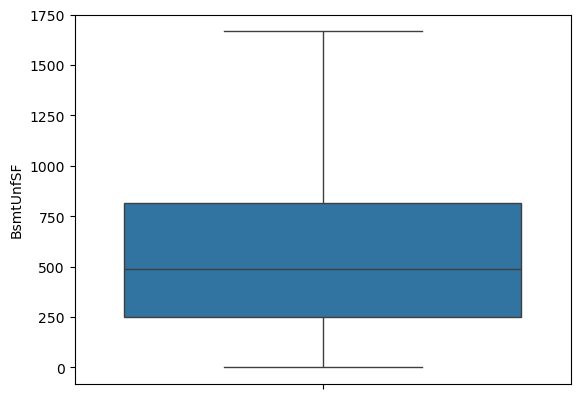

TotalBsmtSF


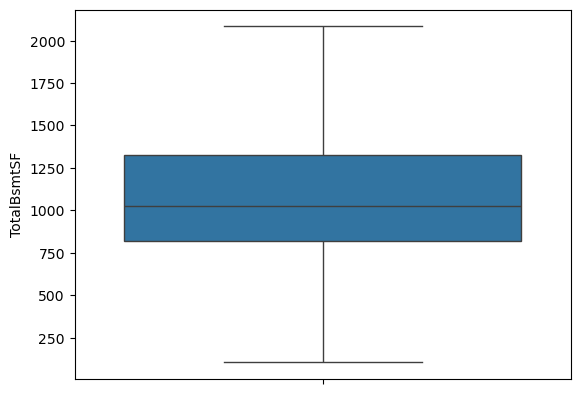

1stFlrSF


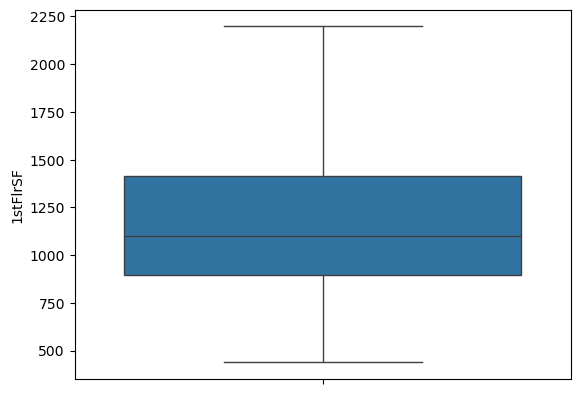

2ndFlrSF


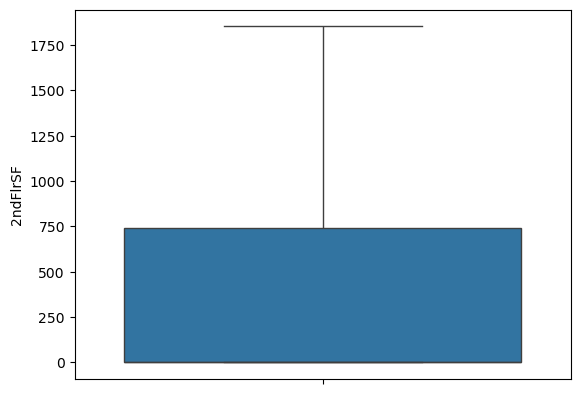

LowQualFinSF


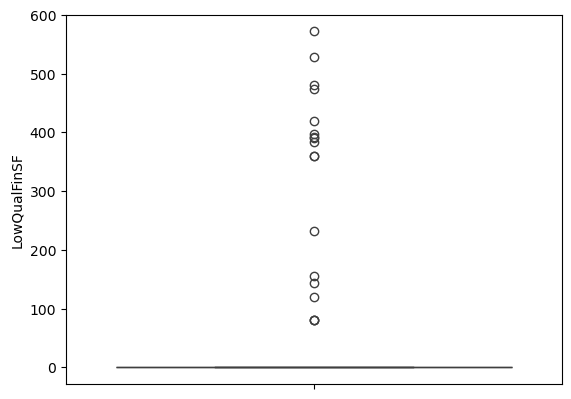

GrLivArea


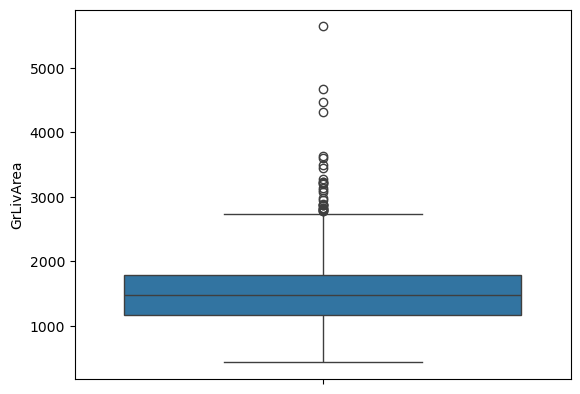

BsmtFullBath


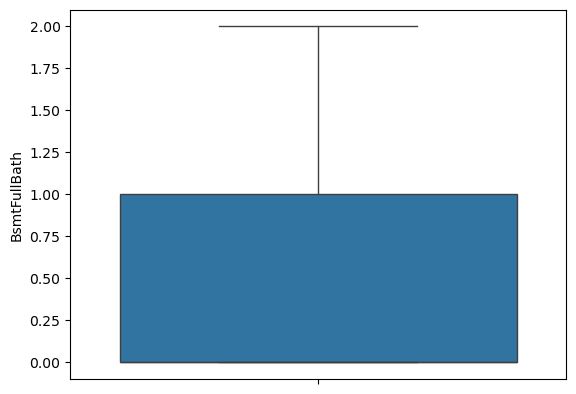

BsmtHalfBath


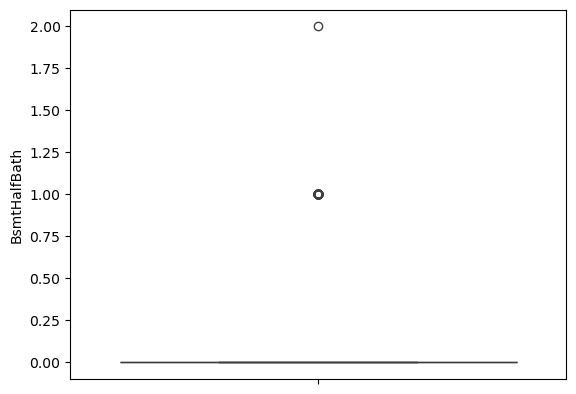

FullBath


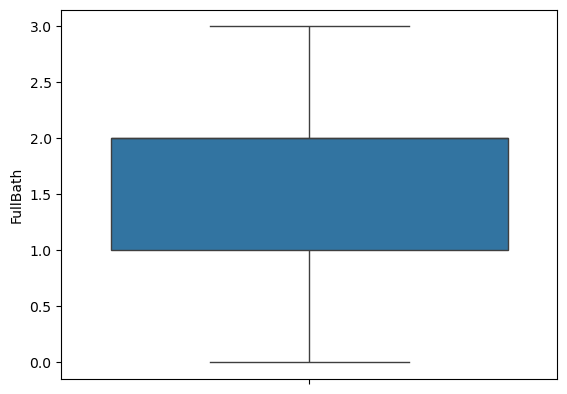

HalfBath


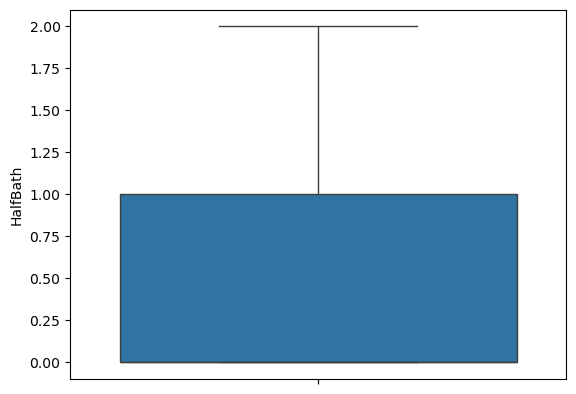

BedroomAbvGr


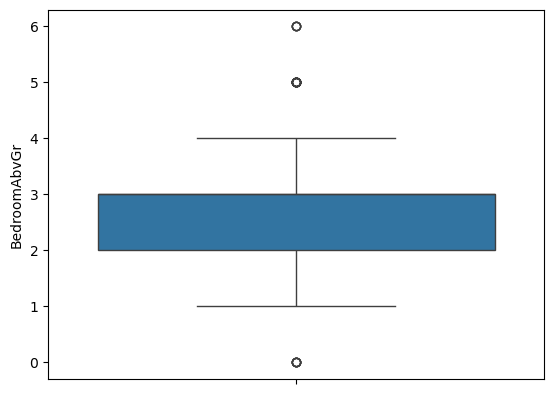

KitchenAbvGr


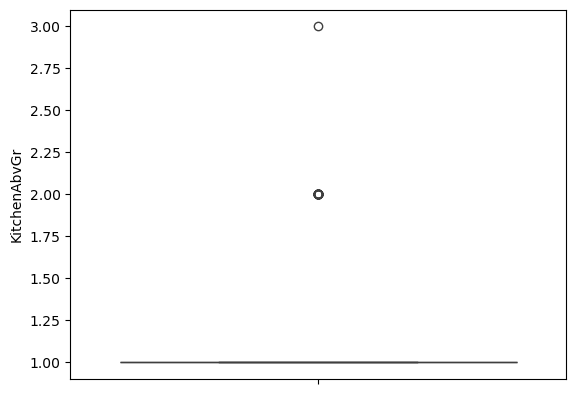

TotRmsAbvGrd


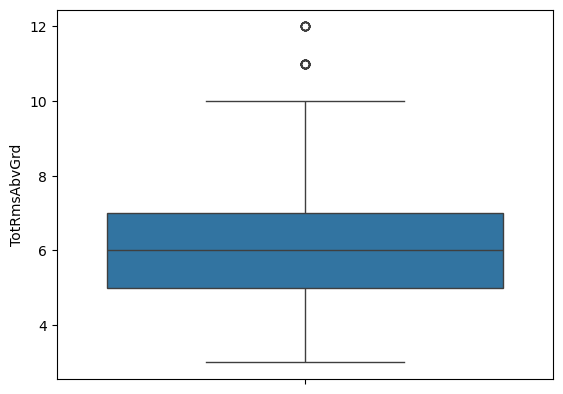

Fireplaces


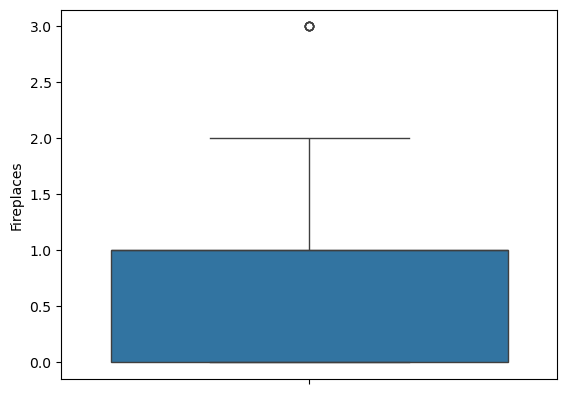

GarageYrBlt


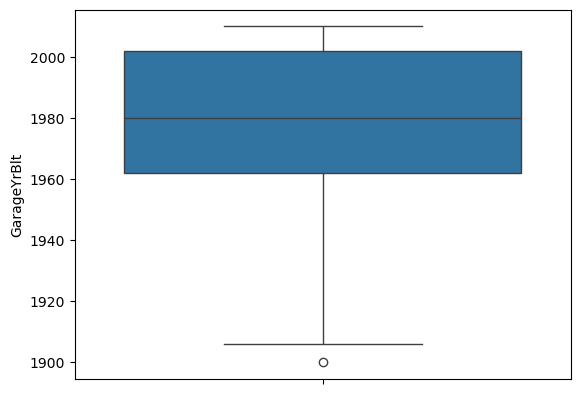

GarageCars


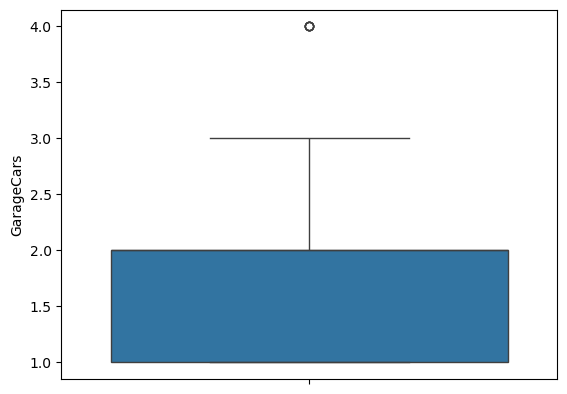

GarageArea


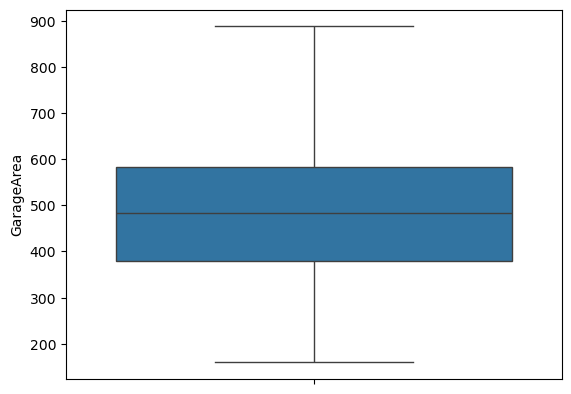

WoodDeckSF


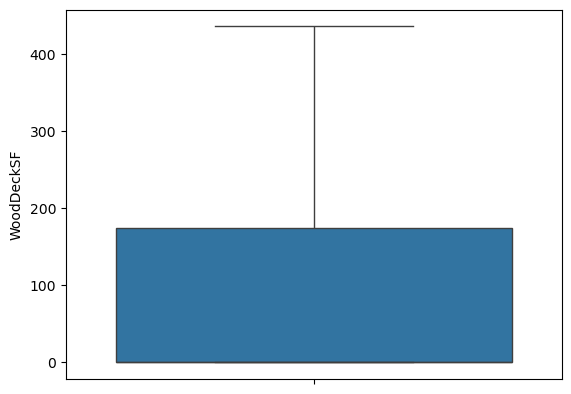

OpenPorchSF


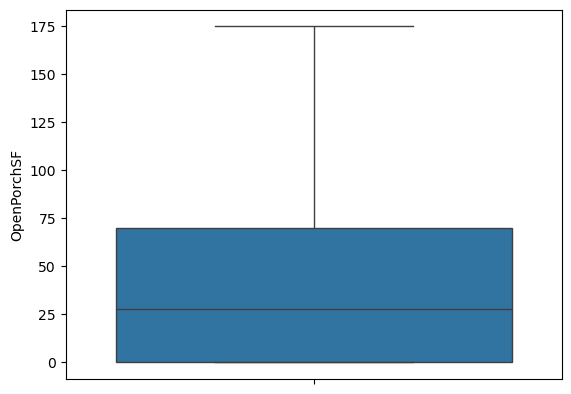

EnclosedPorch


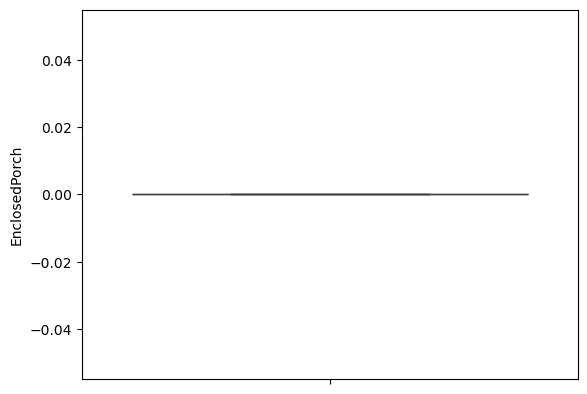

3SsnPorch


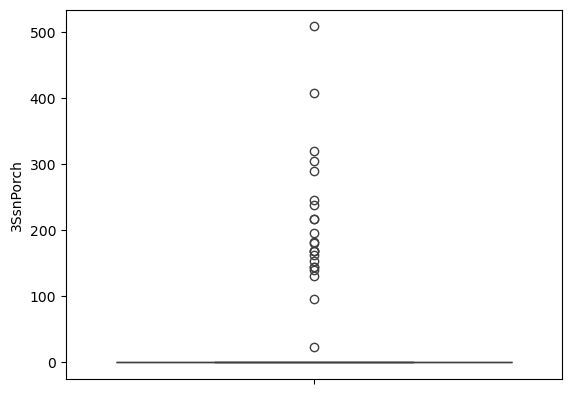

ScreenPorch


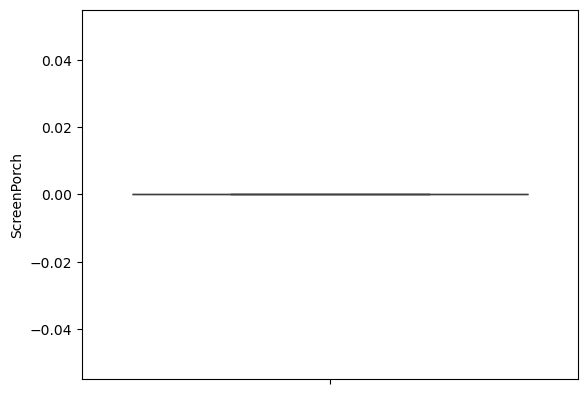

PoolArea


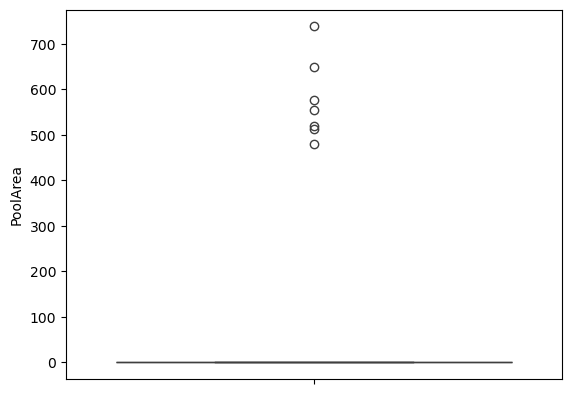

MiscVal


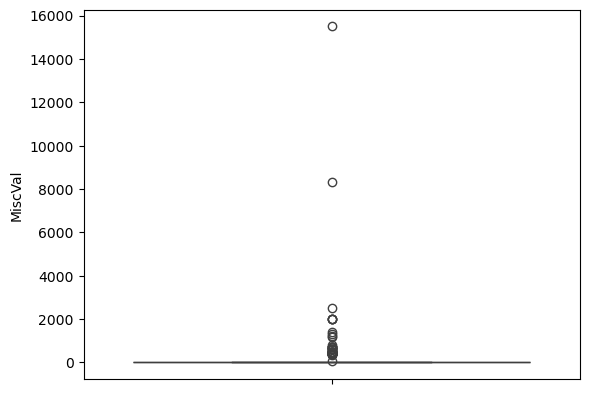

MoSold


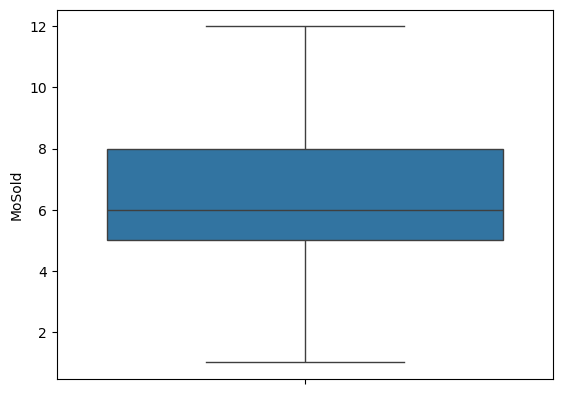

YrSold


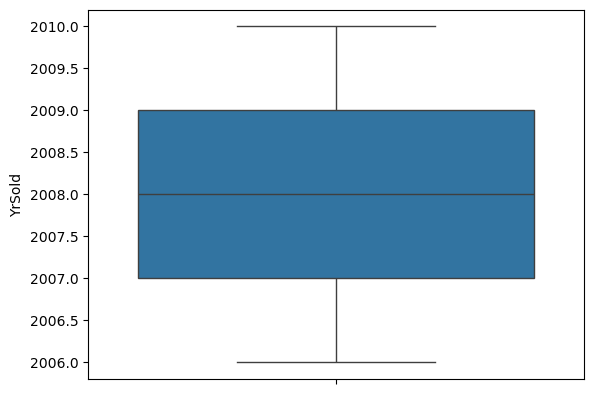

SalePrice


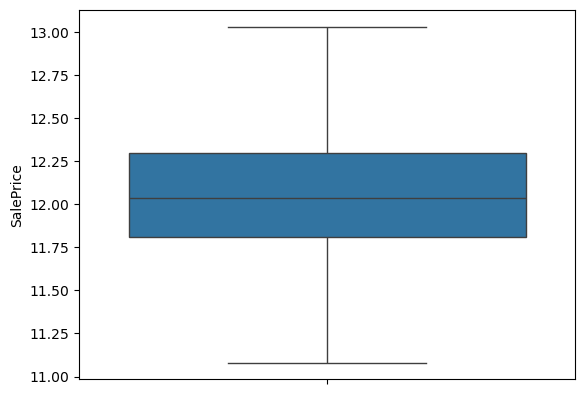

In [41]:
# BoxPlot

for col in data.select_dtypes(include=["int64","float64"]).columns:
    print(col)
    sns.boxplot(data[col])
    plt.show()

In [42]:
# Select numeric columns
numeric_feats = data.select_dtypes(include=['int64', 'float64']).columns

# Compute skewness
skewed_feats = data[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_feats

MiscVal          24.705879
PoolArea         14.230718
LowQualFinSF     10.599121
3SsnPorch        10.127468
KitchenAbvGr      5.874245
BsmtHalfBath      3.861602
MasVnrArea        2.590377
GrLivArea         1.422054
MSSubClass        1.391998
OpenPorchSF       1.119377
WoodDeckSF        1.049003
OverallCond       0.893269
BsmtUnfSF         0.798190
2ndFlrSF          0.756830
BsmtFinSF1        0.689799
1stFlrSF          0.670748
TotRmsAbvGrd      0.668699
TotalBsmtSF       0.637205
Fireplaces        0.572059
HalfBath          0.547324
BsmtFullBath      0.450915
GarageArea        0.433220
OverallQual       0.317943
SalePrice         0.269300
MoSold            0.207268
GarageCars        0.197363
LotArea           0.193909
YrSold            0.109682
LotFrontage       0.071844
ScreenPorch       0.000000
BsmtFinSF2        0.000000
EnclosedPorch     0.000000
Id               -0.002287
FullBath         -0.013590
BedroomAbvGr     -0.062548
YearRemodAdd     -0.569914
GarageYrBlt      -0.675440
Y

## Missing values and outiler removed form the dataset

In [43]:
# After preprocessing data look like 
data.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
300    301         190       RL         90.0  15750.0   Pave      Reg   
777    778          20       RL        100.0  13350.0   Pave      IR1   
1071  1072          60       RL         78.0  11700.0   Pave      Reg   
1174  1175          70       RL         80.0  16560.0   Pave      IR1   
727    728          20       RL         64.0   7314.0   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
300          Lvl    AllPub    Corner  ...           0.0         0         0.0   
777          Lvl    AllPub    Inside  ...           0.0         0         0.0   
1071         Lvl    AllPub    Inside  ...           0.0         0         0.0   
1174         Lvl    AllPub    Inside  ...           0.0         0         0.0   
727          Lvl    AllPub    Inside  ...           0.0         0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
300         0       0      6    2006        WD         Normal  11.964007  
777         0       0      6    2006        WD         Normal  11.867104  
1071        0       0      5    2009        WD         Normal  11.944714  
1174        0       0      7    2006        WD         Normal  12.384223  
727         0       0      2    2009        WD         Normal  12.178193  

[5 rows x 75 columns]

In [44]:
x = data.drop(columns=["Id","SalePrice"])
y = data.iloc[:,-1]

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer,MinMaxScaler,MaxAbsScaler,PowerTransformer,PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [47]:
onehot_cols = [
    "MSZoning",
    "Street",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "Foundation",
    "Heating",
    "CentralAir",
    "Electrical",
    "GarageType",
    "GarageFinish",
    "PavedDrive",
    "SaleType",
    "SaleCondition"
]
ordinal_cols = {
    "ExterQual":     ["Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond":     ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQual":      ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtCond":      ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtExposure":  ["No", "Mn", "Av", "Gd"],
    "BsmtFinType1":  ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2":  ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "HeatingQC":     ["Po", "Fa", "TA", "Gd", "Ex"],
    "KitchenQual":   ["Po", "Fa", "TA", "Gd", "Ex"],
    "Functional":    ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    "GarageQual":    ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageCond":    ["Po", "Fa", "TA", "Gd", "Ex"]
}

binning_cols = ["MSSubClass","OverallCond","LowQualFinSF","GrLivArea",
                "BedroomAbvGr","TotRmsAbvGrd","3SsnPorch","PoolArea","MiscVal"]

power_cols = ["MiscVal","PoolArea","LowQualFinSF","KitchenAbvGr",
              "BsmtHalfBath","MasVnrArea","GrLivArea",
              "MSSubClass","OpenPorchSF","WoodDeckSF"]

num_col = x_train.select_dtypes(include=["int64","float64"]).columns

ordinal_features = list(ordinal_cols.keys())

ordinal_categories = list(ordinal_cols.values())


In [48]:
# binning_pipeline = Pipeline([
#     ("binning", KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="kmeans"))
# ])

power_pipeline = Pipeline([
    ("power", PowerTransformer(method="yeo-johnson", standardize=True))
])

scaler_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# ColumnTransformer with separate pipelines for different numeric sets
preprocessor = ColumnTransformer(
    transformers=[
        ("OHE", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=True), onehot_cols),
        ("Ordinal_en", OrdinalEncoder(categories=ordinal_categories, handle_unknown="use_encoded_value", unknown_value=-1), ordinal_features),
        # ("binning", binning_pipeline, binning_cols),
        ("power", power_pipeline, power_cols),
        ("scaler", scaler_pipeline,num_col)
    ],
    remainder="passthrough"
)

# Fit and transform
X_train_transformed = preprocessor.fit_transform(x_train)
X_test_transformed = preprocessor.transform(x_test)


In [49]:
Algorithm = {
    "LinearRegression" : LinearRegression(),
    "Ri" : Ridge(),
    "Lasso" : Lasso(),
    "SGDRegressor": SGDRegressor(max_iter=15,eta0=0.01)
}

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
for name,model in Algorithm.items():
    model.fit(X_train_transformed,y_train)
    preds = model.predict(X_test_transformed)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test,preds)
    print(f"{name}: MSE = {mse}, R2 = {r2},MAE = {mae}")
    print()

LinearRegression: MSE = 0.031148780781191147, R2 = 0.7575087317477492,MAE = 0.08521974228338747

Ri: MSE = 0.01356232695153543, R2 = 0.8944181511940467,MAE = 0.07476685260681913

Lasso: MSE = 0.12883071813202182, R2 = -0.0029389095237506435,MAE = 0.28094953354479413

SGDRegressor: MSE = 0.23297328615942545, R2 = -0.8136821478356837,MAE = 0.30210446601922974



In [51]:
algo1 = {
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "SVR" : SVR(),
    "AdaBoostRegressor" : AdaBoostRegressor(),
    "GradientBoostingRegressor" : GradientBoostingRegressor()
}

In [52]:
for name,alog in algo1.items():
    alog.fit(X_train_transformed,y_train)
    preds1 = alog.predict(X_test_transformed)
    mse = mean_squared_error(y_test, preds1)
    r2 = r2_score(y_test, preds1)
    mae = mean_absolute_error(y_test,preds1)
    print(f"{name}: MSE = {mse}, R2 = {r2},MAE = {mae}")
    print()

DecisionTreeRegressor: MSE = 0.03942222668191185, R2 = 0.693100484010053,MAE = 0.1428160881321363

RandomForestRegressor: MSE = 0.020127582713296063, R2 = 0.8433080545500375,MAE = 0.09674820484972707

SVR: MSE = 0.015581910497677534, R2 = 0.8786958223207093,MAE = 0.08102610615712343

AdaBoostRegressor: MSE = 0.026408598890347402, R2 = 0.7944107449126155,MAE = 0.12033792702074772

GradientBoostingRegressor: MSE = 0.015161208312856667, R2 = 0.8819709619504218,MAE = 0.08168838854815724



In [53]:
from xgboost import XGBRegressor
algo2 = {
    
    # "AdaBoostRegressor" : AdaBoostRegressor(),
    
    "LinearRegression" : LinearRegression(),
    "ridg" : Ridge(),
    "SVR" : SVR()
}

params = {
#     "AdaBoostRegressor" : {
#         "n_estimators": [100, 200, 300, 500],
#         "learning_rate": [0.01, 0.05, 0.1, 0.2],
#         "loss": ["linear", "square", "exponential"],
# },
   
    "LinearRegression" : {
        "fit_intercept": [True, False],
        "positive": [False, True]
    },
    "ridg" : {
        "alpha": [0.01, 0.1, 1, 10, 50, 100],
        "fit_intercept": [True, False],
        "solver": ["auto", "svd", "cholesky", "saga"]
    },
     "SVR" : {
        "kernel": ["rbf"],
        "C": [2 , 10, 50],
        "epsilon": [0.01, 0.05, 0.1],
        "gamma": ["scale", "auto",0.01, 0.05],
        "max_iter" : [-1,1,2]
    
    }
    
}


In [54]:
from sklearn.model_selection import GridSearchCV

for name, model in algo2.items():
    grid = GridSearchCV(
        model,
        params[name],
        cv=5,
        scoring="r2",
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train_transformed, y_train)
    y_preds = grid.predict(X_test_transformed)
    r2_score(y_test,y_preds)

    print(f"{name}")
    print("Best Params:", grid.best_params_)
    print("Best R2:", grid.best_score_)
    print("Test R2_score",r2_score(y_test,y_preds))
    MSE = mean_squared_error(y_test,y_preds)
    print("MSE" , MSE)
    print("RMSE",np.sqrt(MSE))
    print("-" * 60)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
LinearRegression
Best Params: {'fit_intercept': True, 'positive': True}
Best R2: 0.8824072986568033
Test R2_score 0.7380574897873136
MSE 0.03364735516745419
RMSE 0.1834321541264077
------------------------------------------------------------
Fitting 5 folds for each of 48 candidates, totalling 240 fits
ridg
Best Params: {'alpha': 10, 'fit_intercept': True, 'solver': 'auto'}
Best R2: 0.907467826642763
Test R2_score 0.8876472644307682
MSE 0.01443206906226675
RMSE 0.12013354678134976
------------------------------------------------------------
Fitting 5 folds for each of 108 candidates, totalling 540 fits
SVR
Best Params: {'C': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1}
Best R2: 0.9027588273319225
Test R2_score 0.8815151883411205
MSE 0.015219753894082333
RMSE 0.12336836666699585
------------------------------------------------------------


In [55]:
from xgboost import XGBRegressor 

linear_model = LinearRegression(
    fit_intercept = True,
    positive = True
)

ridge_model = Ridge(
    alpha = 1,
    fit_intercept = True,
    solver = "auto"
)


xgb_model = GradientBoostingRegressor(
    learning_rate=0.01,
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=500,
    subsample=1.0
)

RandomForest =RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42  # optional, for reproducibility
)
XGBRegressor = XGBRegressor(
    n_estimators=2000,        
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

In [56]:
est = [("LinearRegression",linear_model),("ridge_model",ridge_model),("GradientBoostingRegressor",xgb_model),
      ("RandomForest",RandomForest),("XGBRegressor",XGBRegressor)]

In [57]:
vc = VotingRegressor(estimators=est,weights=[3, 1, 1,2,2])
cr = cross_val_score(vc,X_train_transformed,y_train,cv = 10,scoring="r2")
print(np.round(np.mean(cr),2))
vc.fit(X_train_transformed,y_train)
vc_pre = vc.predict(X_test_transformed)
print("r2_score in test",r2_score(y_test,vc_pre))
print(f"mean_abs_erro:{mean_absolute_error(y_test,vc_pre)},mean_squared_error:{mean_squared_error(y_test,vc_pre)},RMSE:{np.sqrt(mean_squared_error(y_test,vc_pre))}")

0.91
r2_score in test 0.8776350074080487
mean_abs_erro:0.07518021128813167,mean_squared_error:0.01571817557395035,RMSE:0.12537214831831808


In [58]:
best_gbr = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=3,
    min_samples_leaf=3,
    min_samples_split=5,
    n_estimators=500,
    subsample=1.0,
    random_state=42
)

# Cross-validation R² on training data
crs = cross_val_score(best_gbr, X_train_transformed, y_train, cv=10, scoring="r2")
print("CV R²:", np.round(np.mean(crs), 3))  # should be ~0.88

# Fit on training data and predict test set
best_gbr.fit(X_train_transformed, y_train)
y_pred = best_gbr.predict(X_test_transformed)
print("Test R²:", r2_score(y_test, y_pred))  # usually ~0.78–0.81


CV R²: 0.893
Test R²: 0.8864115501420347


In [59]:
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Base models with best parameters
best_gbr = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=3,
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=400,
    subsample=0.8,
    random_state=42
)

best_rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

best_xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

# # Optional KNN if you want to include
# best_knn = KNeighborsRegressor(
#     n_neighbors=5,
#     weights="distance",
#     metric="manhattan",
#     p=1
# )

r_f  = Ridge(
    alpha = 1,
    fit_intercept = True,
    solver = "auto"
)

linear_model  = LinearRegression(
    fit_intercept = True,
    positive = True
)

# List of base models
estimators = [
    ("gbr", best_gbr),
    ("rf", best_rf),
    ("xgb", best_xgb),
    # Uncomment below if you want KNN in stacking
    # ("knn", best_knn),
    ("redge",r_f),
    ("linear",linear_model)
]

#Meta-model
meta_model = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=3,
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=400,
    subsample=0.8,
    random_state=42
)

# Stacking regressor
stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,  # internal CV for meta-model
    n_jobs=-1,
    passthrough=True
)

# Cross-validation on training data
cv_scores = cross_val_score(stacked_model, X_train_transformed, y_train, cv=10, scoring="r2")
print("CV R²:", np.round(cv_scores.mean(), 3))

# Fit on full training data
stacked_model.fit(X_train_transformed, y_train)

# Predict on test set
y_pred = stacked_model.predict(X_test_transformed)

# Test R²
test_r2 = r2_score(y_test, y_pred)
print("Test R²:", np.round(test_r2, 3))
print(f"mean_abs_erro:{mean_absolute_error(y_test,y_pred)},mean_squared_error:{mean_squared_error(y_test,y_pred)},RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}")


CV R²: 0.896
Test R²: 0.9
mean_abs_erro:0.07478539695847082,mean_squared_error:0.012876025689598418,RMSE:0.11347257681747788


In [60]:
print("Sample y_train values:", y_train[:5])
print("Sample y_test values:", y_test[:5])
print("Sample y_pred values:", y_pred[:5])

Sample y_train values: 875     12.623064
1402    12.174995
406     11.652696
600     12.524530
835     11.759793
Name: SalePrice, dtype: float64
Sample y_test values: 969     11.849405
1240    12.323416
369     11.995358
753     12.526347
303     11.917730
Name: SalePrice, dtype: float64
Sample y_pred values: [11.88347688 12.27528615 12.00006101 12.54171637 11.83125586]


In [61]:
# Replace your current metric printing with:

# Convert predictions back to dollars
y_pred_dollars = np.expm1(y_pred)
y_test_dollars = np.expm1(y_test)

# Calculate real metrics
mae_dollars = mean_absolute_error(y_test_dollars, y_pred_dollars)
mse_dollars = mean_squared_error(y_test_dollars, y_pred_dollars)
rmse_dollars = np.sqrt(mse_dollars)

# Calculate RMSLE (Kaggle metric)
rmsle = np.sqrt(mean_squared_error(y_test, y_pred))  # Already in log space!

print(f"MAE (Dollars): ${mae_dollars:,.0f}")
print(f"RMSE (Dollars): ${rmse_dollars:,.0f}")
print(f"RMSLE (Kaggle Metric): {rmsle:.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

MAE (Dollars): $14,044
RMSE (Dollars): $24,073
RMSLE (Kaggle Metric): 0.1135
R² Score: 0.8998


In [62]:
test = pd.read_csv("test.csv")
test.sample(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
985  2446          70       RM         57.0     9639   Pave   NaN      Reg   
520  1981         120       RL         89.0     8232   Pave   NaN      IR1   
632  2093          50       RM         81.0     7308   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
985         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
520         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
632         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
985       0      5    2007        WD         Normal  
520       0      6    2008       New        Partial  
632       0      6    2008        WD         Normal  

[3 rows x 80 columns]

In [63]:
# SAVE
import joblib

# Save everything
joblib.dump({
    'preprocessor': preprocessor,
    'model': stacked_model, 
    'simple_imputer': si,
    'feature_names': x_train.columns.tolist(),
    'column_info': {
        'onehot_cols': onehot_cols,
        'ordinal_features': ordinal_features,
        'power_cols': power_cols
    }
}, 'house_price_model_full.pkl')

print("✅ Complete model package saved as 'house_price_model_full.pkl'")

✅ Complete model package saved as 'house_price_model_full.pkl'


In [64]:
# 1. Submit to Kaggle to get actual standing
# test_predictions_log = stacked_model.predict(test_data_transformed)
# test_predictions_dollars = np.expm1(test_predictions_log)

# submission = pd.DataFrame({
#     'Id': test_ids,
#     'SalePrice': test_predictions_dollars
# })
# submission.to_csv('submission_v1.csv', index=False)

In [65]:


# Load data
df = pd.read_csv("test.csv")

# 1. Drop columns you dropped in training
drop_cols = ["MiscFeature", "Fence", "PoolQC", "FireplaceQu", "MasVnrType", "Alley"]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# 2. Impute LotFrontage and MasVnrArea
si = SimpleImputer(strategy="mean")
df["LotFrontage"] = si.fit_transform(df[["LotFrontage"]])
df["MasVnrArea"] = si.fit_transform(df[["MasVnrArea"]])

# 3. Fill ALL remaining missing values
# Categorical -> "None" or mode
# Numerical -> 0 (for area/count features)

# Garage related
garage_cat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in garage_cat:
    if col in df.columns:
        df[col] = df[col].fillna("None")

df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["GarageCars"] = df["GarageCars"].fillna(0)
df["GarageArea"] = df["GarageArea"].fillna(0)

# Basement related  
bsmt_cat = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in bsmt_cat:
    if col in df.columns:
        df[col] = df[col].fillna("None")

bsmt_num = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", 
            "BsmtFullBath", "BsmtHalfBath"]
for col in bsmt_num:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Other categoricals
other_cat = ["MSZoning", "Utilities", "Exterior1st", "Exterior2nd",
             "KitchenQual", "Functional", "SaleType", "Electrical"]
for col in other_cat:
    if col in df.columns and df[col].isnull().any():
        mode_val = df[col].mode()[0] if len(df[col].mode()) > 0 else "None"
        df[col] = df[col].fillna(mode_val)

# 4. Verify
print("✅ Test data ready!")
print(f"Shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")

✅ Test data ready!
Shape: (1459, 74)
Missing values: 0


In [66]:
df.isnull().mean()

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

In [67]:
# Apply the SAME outlier handling you did in training
outiler_col = ["LotFrontage", "LotArea", "BsmtFinSF1", "BsmtFinSF2",
               "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF",
               "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
               "ScreenPorch"]

def iqr_range(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(
        data[col] < lower_bound, lower_bound,
        np.where(data[col] > upper_bound, upper_bound, data[col])
    )
    return data

for col in outiler_col:
    if col in df.columns:
        df = iqr_range(df, col)

print("✅ Outlier handling applied!")

✅ Outlier handling applied!


In [68]:
saved_data = joblib.load('house_price_model_full.pkl')
preprocessor = saved_data['preprocessor']
stacked_model = saved_data['model']

In [69]:
test_ids = df['Id'].copy()


In [70]:
#KAGGLE SUBMISSION 
X_kaggle = df.drop(['Id'], axis=1)

# Check column alignment
if hasattr(preprocessor, 'feature_names_in_'):
    expected_cols = preprocessor.feature_names_in_
    X_kaggle = X_kaggle[expected_cols]  # Reorder to match

# 5. Transform and predict
X_kaggle_transformed = preprocessor.transform(X_kaggle)
kaggle_predictions_log = stacked_model.predict(X_kaggle_transformed)

# 6. Convert to dollars
kaggle_predictions_dollars = np.expm1(kaggle_predictions_log)

# 7. Create submission
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': kaggle_predictions_dollars
})

submission.to_csv('kaggle_submission_final.csv', index=False)
print("✅ Kaggle submission ready!")

✅ Kaggle submission ready!
